<a href="https://colab.research.google.com/github/chiara-pupillo/ML-AN/blob/main/CP_MAL_AN_10_08_(def%2C_en).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
pip install scikit-optimize

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, auc, average_precision_score, precision_score, precision_recall_curve, recall_score, f1_score, classification_report, roc_curve
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from skopt import BayesSearchCV

In [10]:
import warnings
warnings.filterwarnings('ignore')

# Pre-processing: EDA



In [11]:
file_path = '/content/drive/MyDrive/Analisi database/Database_AN(en).xlsx'
df = pd.read_excel(file_path)
df.head(10)

,ID,Age,Illness duration,Education level (years),Gender,Age first diagnosis,TYPE,BMI (admission),BMI (discharge),Hospitalization length,...,PGWBI-Depressionr,PGWBI-Positivity and Wellbeingr,PGWBI-Self-Controlr,PGWBI-General Healthr,PGWBI-Vitalityr,PGWBI-Total Scorer,FMPS-Concern Over Mistakesr,FMPS-Organizationr,FMPS-Personal Standardr,FMPS-Parental Expectation and Parental Criticismr
0,3,13,0,3.0,0,13.0,0,14.42,14.31,45,...,11,7,9,8,13,60,35,14,21,27
1,4,16,1,3.0,0,15.0,0,14.87,15.03,33,...,13,8,5,12,8,60,62,30,27,21
2,5,20,2,4.0,0,18.0,0,13.00,13.50,21,...,1,5,6,9,17,42,48,20,25,23
3,7,17,2,3.0,0,15.0,0,13.55,13.95,43,...,7,8,7,12,10,50,56,21,20,19
4,13,54,41,3.0,0,13.0,1,13.50,13.81,28,...,9,8,7,11,14,59,35,19,11,12
5,14,41,29,5.0,0,12.0,0,14.16,14.16,28,...,10,3,7,9,4,43,42,28,25,37
6,19,21,6,3.0,0,15.0,0,15.06,15.67,29,...,9,7,7,12,8,52,36,11,15,20
7,20,39,25,3.0,0,14.0,1,13.54,14.58,30,...,11,5,8,6,9,54,50,25,16,23
8,22,14,2,2.0,0,12.0,0,12.78,14.49,42,...,3,2,6,8,8,34,55,19,29,25
9,27,20,2,3.0,0,18.0,0,13.85,14.13,27,...,14,13,12,12,16,88,31,17,18,21


In [12]:
df.info()
df.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Columns: 116 entries, ID to FMPS-Parental Expectation and Parental Criticismr
dtypes: float64(44), int64(72)
memory usage: 65.4 KB


,0
ID,72
Age,72
Illness duration,72
Education level (years),67
Gender,72
...,...
PGWBI-Total Scorer,72
FMPS-Concern Over Mistakesr,72
FMPS-Organizationr,72
FMPS-Personal Standardr,72


In [13]:
df.shape

(72, 116)

In [14]:
df.columns.tolist()

['ID',
 'Age',
 'Illness duration',
 'Education level (years)',
 'Gender',
 'Age first diagnosis',
 'TYPE',
 'BMI (admission)',
 'BMI (discharge)',
 'Hospitalization length',
 'BIA-ECW',
 'BIA-BCM',
 'BIA-PA',
 'BIA-ECWr',
 'BIA-BCMr',
 'BIA-Par',
 'EDI3-DT',
 'EDI3-B',
 'EDI3-BD',
 'EDI3-EDRC',
 'EDI3-LSE',
 'EDI3-PA',
 'EDI3-II',
 'EDI3-IA',
 'EDI3-ID',
 'EDI3-ED',
 'EDI3-P',
 'EDI3-A',
 'EDI3-MF',
 'EDI3-IC',
 'EDI3-IPC',
 'EDI3-APC',
 'EDI3-OC',
 'EDI3-GPMC',
 'EDI3-IN',
 'EDI3-IF',
 'EDI3-NI',
 'SCL-90-Somatization',
 'SCL-90-Obsession/Compulsivity',
 'SCL-90-Interpersonal Sensitivity',
 'SCL-90-Depression',
 'SCL-90-Anxiety',
 'SCL-90-Hostility',
 'SCL-90-Phobic Anxiety',
 'SCL-90-Psychoticism',
 'SCL-90-Paranoid Ideation',
 'SCL-90-SCL Global Index',
 'BUT-GSI ',
 'BUT-WP ',
 'BUT-BIC ',
 'BUT-A ',
 'BUT-CSM ',
 'BUT-D ',
 'BUT-PST ',
 'BUT-PSDI ',
 'PGWBI-Anxiety',
 'PGWBI-Depression',
 'PGWBI-Positivity and Wellbeing',
 'PGWBI-Self-Control',
 'PGWBI-General Health',
 'PGWBI-Vi

In [15]:
n_pz = df.shape[0]
print("The total number of patients in the DataFrame df is:", n_pz)

The total number of patients in the DataFrame df is: 72


In [16]:
range_columns = {}
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        column_min = df[column].min()
        column_max = df[column].max()
        range_columns[column] = (column_min, column_max)

for column, (min_val, max_val) in range_columns.items():
    print(f'Variable: {column}, Range: ({min_val}, {max_val})')

Variable: ID, Range: (3, 254)
Variable: Age, Range: (13, 66)
Variable: Illness duration, Range: (0, 58)
Variable: Education level (years), Range: (2.0, 5.0)
Variable: Gender, Range: (0, 1)
Variable: Age first diagnosis, Range: (10.0, 50.0)
Variable: TYPE, Range: (0, 1)
Variable: BMI (admission), Range: (9.73, 16.87)
Variable: BMI (discharge), Range: (10.22, 17.56)
Variable: Hospitalization length, Range: (21, 59)
Variable: BIA-ECW, Range: (8.6, 57.0)
Variable: BIA-BCM, Range: (1.6, 32.1)
Variable: BIA-PA, Range: (1.3, 7.8)
Variable: BIA-ECWr, Range: (10.4, 26.9)
Variable: BIA-BCMr, Range: (1.9, 38.9)
Variable: BIA-Par, Range: (1.5, 6.3)
Variable: EDI3-DT, Range: (0, 28)
Variable: EDI3-B, Range: (0, 32)
Variable: EDI3-BD, Range: (15, 40)
Variable: EDI3-EDRC, Range: (20, 96)
Variable: EDI3-LSE, Range: (1, 24)
Variable: EDI3-PA, Range: (2, 28)
Variable: EDI3-II, Range: (0, 26)
Variable: EDI3-IA, Range: (1, 28)
Variable: EDI3-ID, Range: (2, 36)
Variable: EDI3-ED, Range: (0, 37)
Variable: E

In [17]:
Nan = df.isna().sum()
col_Nan = Nan[Nan > 0]
print(col_Nan)
#Si vedono in quali colonne si hanno valori NaN e quanti sono per ciascuna colonna

Education level (years)     5
Age first diagnosis        10
BIA-ECW                     9
BIA-BCM                     6
BIA-PA                      6
BIA-ECWr                   43
BIA-BCMr                   42
BIA-Par                    42
dtype: int64


In [18]:
#Check duplicated
dups = df.duplicated()
print(f'Are there duplicates? = {dups.any()}')

Are there duplicates? = False


In [19]:
#Descriptive analysis
with pd.option_context('display.max_rows', None):
    display(df.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
ID,72.0,119.527778,77.537809,3.0000,40.5000,132.000,189.2500,254.00
Age,72.0,24.111111,12.440909,13.0000,17.0000,20.000,25.2500,66.00
Illness duration,72.0,10.138889,12.533117,0.0000,2.0000,5.000,16.2500,58.00
Education level (years),67.0,3.134328,0.756698,2.0000,3.0000,3.000,3.0000,5.00
Gender,72.0,0.055556,0.230669,0.0000,0.0000,0.000,0.0000,1.00
Age first diagnosis,62.0,16.225806,6.410594,10.0000,13.0000,15.000,18.0000,50.00
TYPE,72.0,0.250000,0.436051,0.0000,0.0000,0.000,0.2500,1.00
BMI (admission),72.0,14.134306,1.583735,9.7300,13.1625,14.015,15.3700,16.87
BMI (discharge),72.0,14.492222,1.452405,10.2200,13.3950,14.575,15.4625,17.56
Hospitalization length,72.0,35.833333,9.075582,21.0000,28.0000,33.000,42.0000,59.00


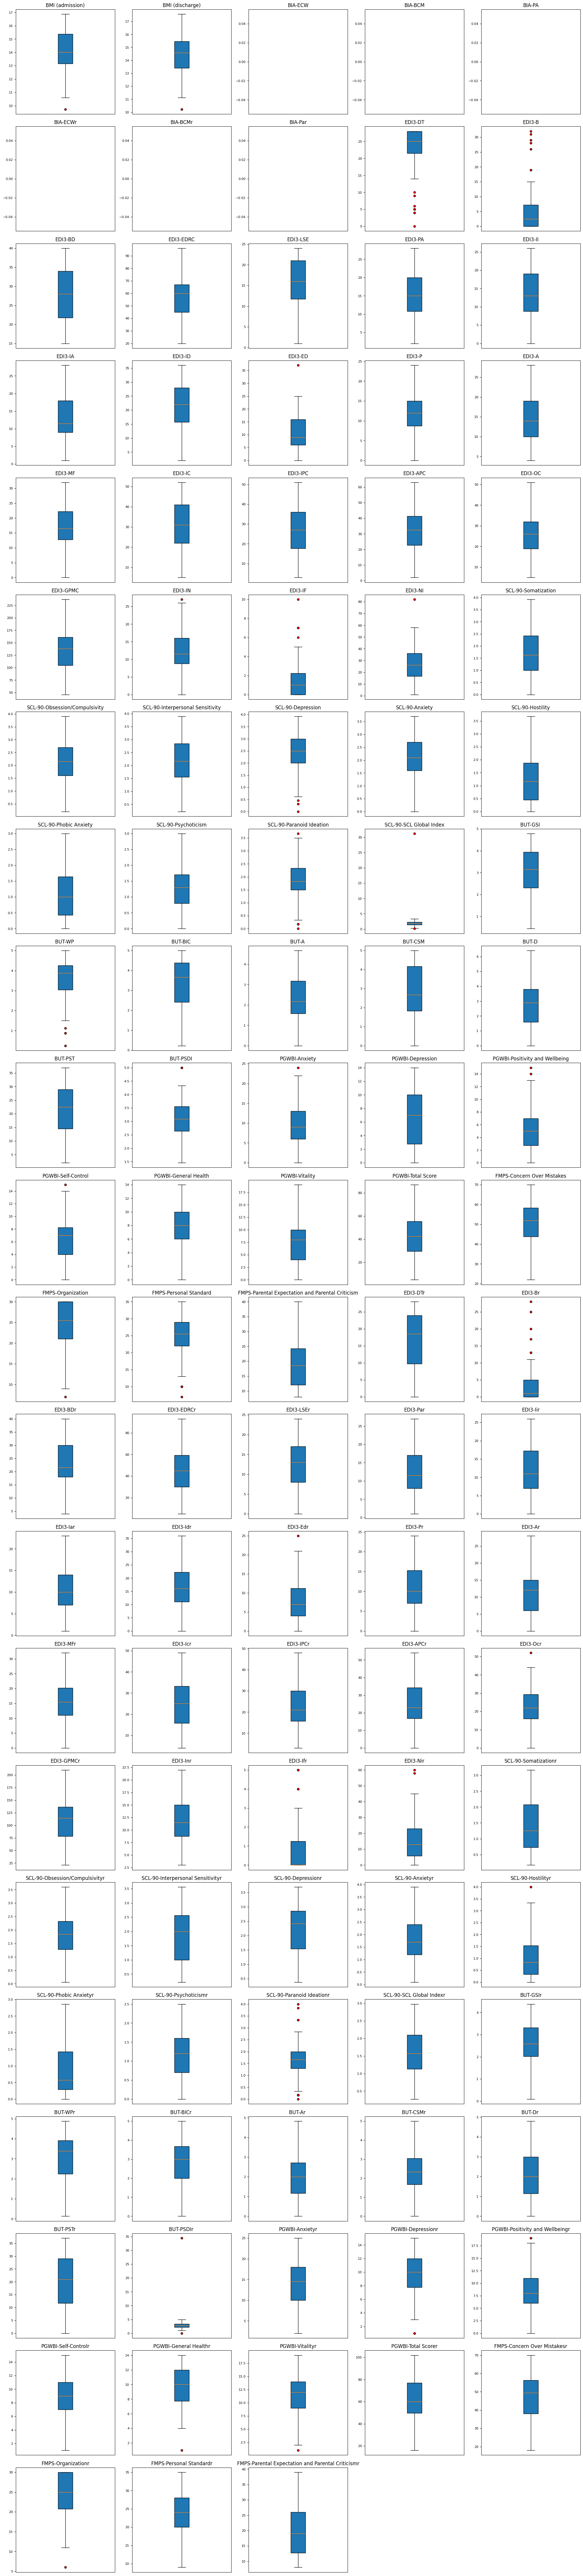

In [20]:
variables = ['BMI (admission)', 'BMI (discharge)', 'BIA-ECW', 'BIA-BCM', 'BIA-PA', 'BIA-ECWr', 'BIA-BCMr', 'BIA-Par',
             'EDI3-DT', 'EDI3-B', 'EDI3-BD', 'EDI3-EDRC', 'EDI3-LSE', 'EDI3-PA', 'EDI3-II', 'EDI3-IA', 'EDI3-ID',
             'EDI3-ED', 'EDI3-P', 'EDI3-A', 'EDI3-MF', 'EDI3-IC', 'EDI3-IPC', 'EDI3-APC', 'EDI3-OC', 'EDI3-GPMC',
             'EDI3-IN', 'EDI3-IF', 'EDI3-NI', 'SCL-90-Somatization', 'SCL-90-Obsession/Compulsivity',
             'SCL-90-Interpersonal Sensitivity', 'SCL-90-Depression', 'SCL-90-Anxiety', 'SCL-90-Hostility',
             'SCL-90-Phobic Anxiety', 'SCL-90-Psychoticism', 'SCL-90-Paranoid Ideation', 'SCL-90-SCL Global Index',
             'BUT-GSI ', 'BUT-WP ', 'BUT-BIC ', 'BUT-A ', 'BUT-CSM ', 'BUT-D ', 'BUT-PST ', 'BUT-PSDI ',
             'PGWBI-Anxiety', 'PGWBI-Depression', 'PGWBI-Positivity and Wellbeing', 'PGWBI-Self-Control',
             'PGWBI-General Health', 'PGWBI-Vitality', 'PGWBI-Total Score', 'FMPS-Concern Over Mistakes',
             'FMPS-Organization', 'FMPS-Personal Standard', 'FMPS-Parental Expectation and Parental Criticism',
             'EDI3-DTr', 'EDI3-Br', 'EDI3-BDr', 'EDI3-EDRCr', 'EDI3-LSEr', 'EDI3-Par', 'EDI3-Iir', 'EDI3-Iar',
             'EDI3-Idr', 'EDI3-Edr', 'EDI3-Pr', 'EDI3-Ar', 'EDI3-MFr', 'EDI3-Icr', 'EDI3-IPCr', 'EDI3-APCr',
             'EDI3-Ocr', 'EDI3-GPMCr', 'EDI3-Inr', 'EDI3-Ifr', 'EDI3-Nir', 'SCL-90-Somatizationr', 'SCL-90-Obsession/Compulsivityr',
             'SCL-90-Interpersonal Sensitivityr', 'SCL-90-Depressionr', 'SCL-90-Anxietyr', 'SCL-90-Hostilityr',
             'SCL-90-Phobic Anxietyr', 'SCL-90-Psychoticismr', 'SCL-90-Paranoid Ideationr', 'SCL-90-SCL Global Indexr', 'BUT-GSIr', 'BUT-WPr ', 'BUT-BICr ',
             'BUT-Ar ', 'BUT-CSMr ', 'BUT-Dr ', 'BUT-PSTr ', 'BUT-PSDIr ', 'PGWBI-Anxietyr', 'PGWBI-Depressionr', 'PGWBI-Positivity and Wellbeingr', 'PGWBI-Self-Controlr',
             'PGWBI-General Healthr', 'PGWBI-Vitalityr', 'PGWBI-Total Scorer', 'FMPS-Concern Over Mistakesr',
             'FMPS-Organizationr', 'FMPS-Personal Standardr', 'FMPS-Parental Expectation and Parental Criticismr']

n_rows = len(variables) // 5 + 1
n_cols = min(len(variables), 5)

plt.figure(figsize=(20, n_rows * 4))

# Box plot for each variable
for i, var in enumerate(variables, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df[var], patch_artist=True, showfliers=True, flierprops=dict(marker='o', markersize=5, markerfacecolor='red', linestyle='none'))
    plt.title(var)
    plt.grid(False)
    plt.xticks([])
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

In [21]:
df1 = df.copy()

In [22]:
#Building label - numeric values
df1['delta BMI'] = df1['BMI (discharge)'] - df1['BMI (admission)']
df1

,ID,Age,Illness duration,Education level (years),Gender,Age first diagnosis,TYPE,BMI (admission),BMI (discharge),Hospitalization length,...,PGWBI-Positivity and Wellbeingr,PGWBI-Self-Controlr,PGWBI-General Healthr,PGWBI-Vitalityr,PGWBI-Total Scorer,FMPS-Concern Over Mistakesr,FMPS-Organizationr,FMPS-Personal Standardr,FMPS-Parental Expectation and Parental Criticismr,delta BMI
0,3,13,0,3.0,0,13.0,0,14.42,14.31,45,...,7,9,8,13,60,35,14,21,27,-0.11
1,4,16,1,3.0,0,15.0,0,14.87,15.03,33,...,8,5,12,8,60,62,30,27,21,0.16
2,5,20,2,4.0,0,18.0,0,13.00,13.50,21,...,5,6,9,17,42,48,20,25,23,0.50
3,7,17,2,3.0,0,15.0,0,13.55,13.95,43,...,8,7,12,10,50,56,21,20,19,0.40
4,13,54,41,3.0,0,13.0,1,13.50,13.81,28,...,8,7,11,14,59,35,19,11,12,0.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,222,20,10,3.0,0,10.0,0,14.65,14.65,33,...,8,10,8,9,60,50,30,30,24,0.00
68,244,17,17,3.0,0,NaN,0,16.80,17.50,24,...,12,9,11,11,70,40,17,20,26,0.70
69,248,58,58,2.0,0,NaN,1,16.82,17.03,28,...,16,14,14,17,90,55,21,29,32,0.21
70,135,13,1,2.0,1,12.0,0,14.49,15.05,37,...,18,15,13,17,96,46,28,34,22,0.56


In [23]:
#Building label - binary classes (≥0 = 1, <0 = 0)
def binary_label(delta_bmi):
    if delta_bmi >= 0:
        return 1
    else:
        return 0

df1['Label_BMI'] = df1['delta BMI'].apply(binary_label)
df1

,ID,Age,Illness duration,Education level (years),Gender,Age first diagnosis,TYPE,BMI (admission),BMI (discharge),Hospitalization length,...,PGWBI-Self-Controlr,PGWBI-General Healthr,PGWBI-Vitalityr,PGWBI-Total Scorer,FMPS-Concern Over Mistakesr,FMPS-Organizationr,FMPS-Personal Standardr,FMPS-Parental Expectation and Parental Criticismr,delta BMI,Label_BMI
0,3,13,0,3.0,0,13.0,0,14.42,14.31,45,...,9,8,13,60,35,14,21,27,-0.11,0
1,4,16,1,3.0,0,15.0,0,14.87,15.03,33,...,5,12,8,60,62,30,27,21,0.16,1
2,5,20,2,4.0,0,18.0,0,13.00,13.50,21,...,6,9,17,42,48,20,25,23,0.50,1
3,7,17,2,3.0,0,15.0,0,13.55,13.95,43,...,7,12,10,50,56,21,20,19,0.40,1
4,13,54,41,3.0,0,13.0,1,13.50,13.81,28,...,7,11,14,59,35,19,11,12,0.31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,222,20,10,3.0,0,10.0,0,14.65,14.65,33,...,10,8,9,60,50,30,30,24,0.00,1
68,244,17,17,3.0,0,NaN,0,16.80,17.50,24,...,9,11,11,70,40,17,20,26,0.70,1
69,248,58,58,2.0,0,NaN,1,16.82,17.03,28,...,14,14,17,90,55,21,29,32,0.21,1
70,135,13,1,2.0,1,12.0,0,14.49,15.05,37,...,15,13,17,96,46,28,34,22,0.56,1


In [24]:
# https://www.mikulskibartosz.name/how-to-set-the-global-random_state-in-scikit-learn/
# fix numpy random seed to assure reproducable results (also in sklearn)
#-----------------------------------------------------------------------------------------------------------
# IMPORTANT: When cells with randomness are executed in different orders this leads to different results.
#-----------------------------------------------------------------------------------------------------------
RANDOM_SEED = 235457

np.random.seed(RANDOM_SEED)

In [25]:
#Imputation of missing values with KNNImputer
imputer = KNNImputer(n_neighbors=5)
imputed_data = imputer.fit_transform(df1)
df1_noNan = pd.DataFrame(data=imputed_data, columns=df1.columns)

In [26]:
Nan = df1_noNan.isna().sum()
col_Nan = Nan[Nan > 0]
print(col_Nan)

Series([], dtype: int64)


In [27]:
n_pz = df1_noNan.shape[0]
print("The total number of patients in the DataFrame df is:", n_pz)

The total number of patients in the DataFrame df is: 72


In [28]:
df1_noNan

,ID,Age,Illness duration,Education level (years),Gender,Age first diagnosis,TYPE,BMI (admission),BMI (discharge),Hospitalization length,...,PGWBI-Self-Controlr,PGWBI-General Healthr,PGWBI-Vitalityr,PGWBI-Total Scorer,FMPS-Concern Over Mistakesr,FMPS-Organizationr,FMPS-Personal Standardr,FMPS-Parental Expectation and Parental Criticismr,delta BMI,Label_BMI
0,3.0,13.0,0.0,3.0,0.0,13.0,0.0,14.42,14.31,45.0,...,9.0,8.0,13.0,60.0,35.0,14.0,21.0,27.0,-0.11,0.0
1,4.0,16.0,1.0,3.0,0.0,15.0,0.0,14.87,15.03,33.0,...,5.0,12.0,8.0,60.0,62.0,30.0,27.0,21.0,0.16,1.0
2,5.0,20.0,2.0,4.0,0.0,18.0,0.0,13.00,13.50,21.0,...,6.0,9.0,17.0,42.0,48.0,20.0,25.0,23.0,0.50,1.0
3,7.0,17.0,2.0,3.0,0.0,15.0,0.0,13.55,13.95,43.0,...,7.0,12.0,10.0,50.0,56.0,21.0,20.0,19.0,0.40,1.0
4,13.0,54.0,41.0,3.0,0.0,13.0,1.0,13.50,13.81,28.0,...,7.0,11.0,14.0,59.0,35.0,19.0,11.0,12.0,0.31,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,222.0,20.0,10.0,3.0,0.0,10.0,0.0,14.65,14.65,33.0,...,10.0,8.0,9.0,60.0,50.0,30.0,30.0,24.0,0.00,1.0
68,244.0,17.0,17.0,3.0,0.0,14.6,0.0,16.80,17.50,24.0,...,9.0,11.0,11.0,70.0,40.0,17.0,20.0,26.0,0.70,1.0
69,248.0,58.0,58.0,2.0,0.0,15.2,1.0,16.82,17.03,28.0,...,14.0,14.0,17.0,90.0,55.0,21.0,29.0,32.0,0.21,1.0
70,135.0,13.0,1.0,2.0,1.0,12.0,0.0,14.49,15.05,37.0,...,15.0,13.0,17.0,96.0,46.0,28.0,34.0,22.0,0.56,1.0


In [29]:
#Descriptive analysis with imputed data
with pd.option_context('display.max_rows', None):
    display(df1_noNan.describe().transpose())

,count,mean,std,min,25%,50%,75%,max
ID,72.0,119.527778,77.537809,3.0000,40.5000,132.000,189.2500,254.00
Age,72.0,24.111111,12.440909,13.0000,17.0000,20.000,25.2500,66.00
Illness duration,72.0,10.138889,12.533117,0.0000,2.0000,5.000,16.2500,58.00
Education level (years),72.0,3.125000,0.735757,2.0000,3.0000,3.000,3.0000,5.00
Gender,72.0,0.055556,0.230669,0.0000,0.0000,0.000,0.0000,1.00
Age first diagnosis,72.0,16.069444,5.971497,10.0000,13.0000,15.000,18.0000,50.00
TYPE,72.0,0.250000,0.436051,0.0000,0.0000,0.000,0.2500,1.00
BMI (admission),72.0,14.134306,1.583735,9.7300,13.1625,14.015,15.3700,16.87
BMI (discharge),72.0,14.492222,1.452405,10.2200,13.3950,14.575,15.4625,17.56
Hospitalization length,72.0,35.833333,9.075582,21.0000,28.0000,33.000,42.0000,59.00


In [30]:
df2 = df1_noNan.drop('delta BMI', axis=1).copy()

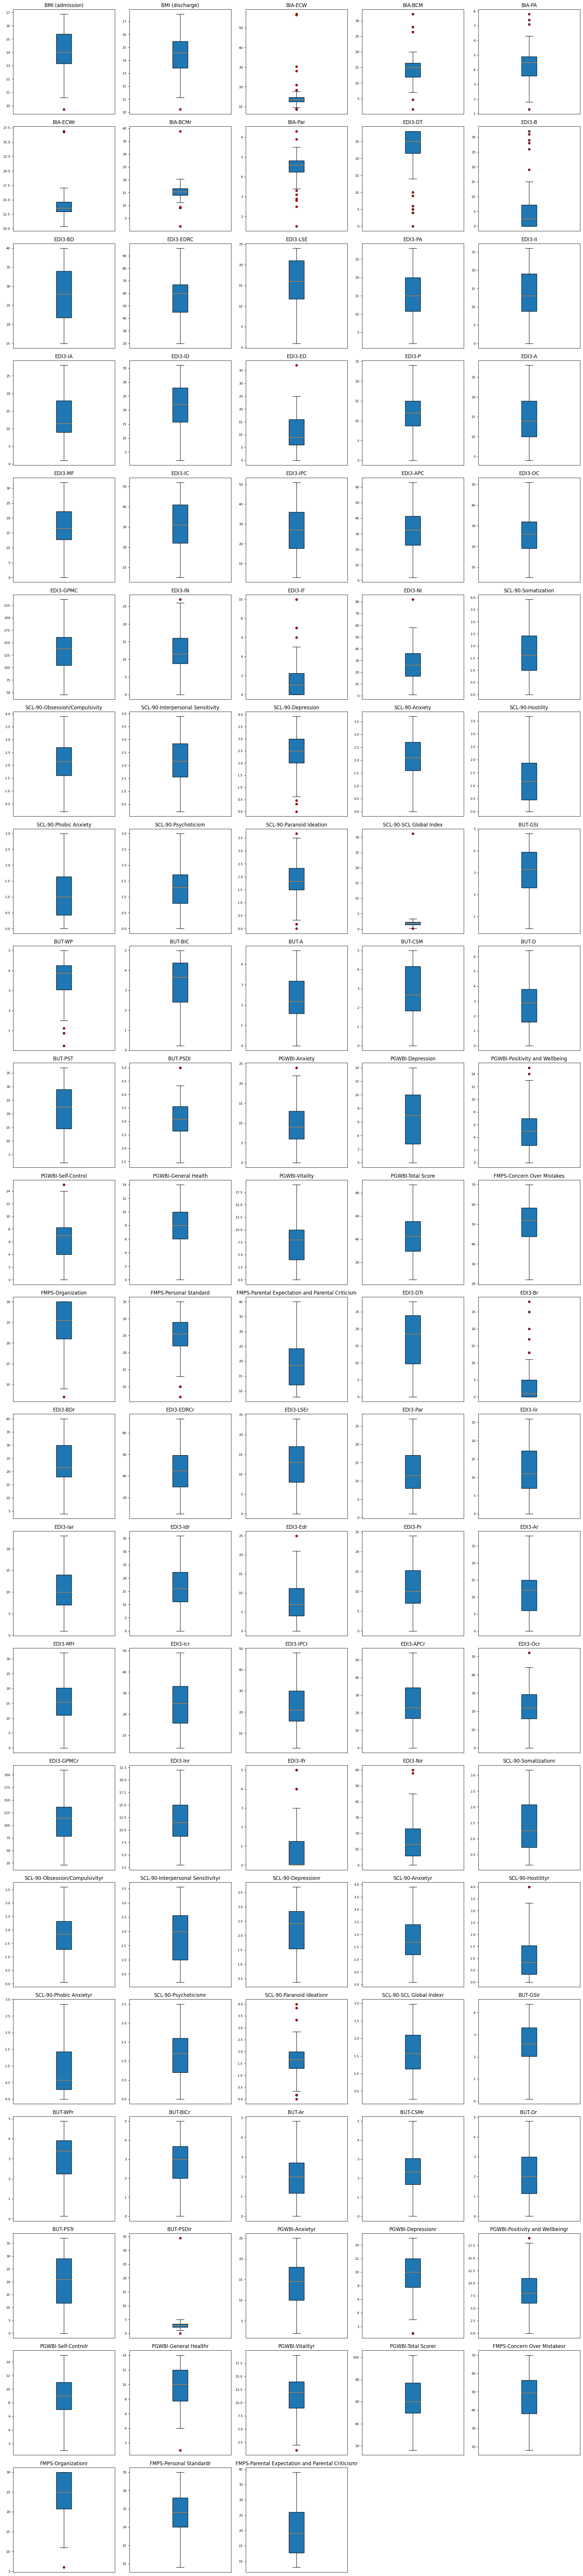

In [31]:
# Box plot for each imputated variable
n_rows = len(variables) // 5 + 1
n_cols = min(len(variables), 5)

plt.figure(figsize=(20, n_rows * 4))

for i, var in enumerate(variables, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.boxplot(df2[var], patch_artist=True, showfliers=True, flierprops=dict(marker='o', markersize=5, markerfacecolor='red', linestyle='none'))
    plt.title(var)
    plt.grid(False)
    plt.xticks([])
    plt.yticks(fontsize=8)

plt.tight_layout()
plt.show()

#Training and testing of ML models










In [32]:
df2.head(5)

,ID,Age,Illness duration,Education level (years),Gender,Age first diagnosis,TYPE,BMI (admission),BMI (discharge),Hospitalization length,...,PGWBI-Positivity and Wellbeingr,PGWBI-Self-Controlr,PGWBI-General Healthr,PGWBI-Vitalityr,PGWBI-Total Scorer,FMPS-Concern Over Mistakesr,FMPS-Organizationr,FMPS-Personal Standardr,FMPS-Parental Expectation and Parental Criticismr,Label_BMI
0,3.0,13.0,0.0,3.0,0.0,13.0,0.0,14.42,14.31,45.0,...,7.0,9.0,8.0,13.0,60.0,35.0,14.0,21.0,27.0,0.0
1,4.0,16.0,1.0,3.0,0.0,15.0,0.0,14.87,15.03,33.0,...,8.0,5.0,12.0,8.0,60.0,62.0,30.0,27.0,21.0,1.0
2,5.0,20.0,2.0,4.0,0.0,18.0,0.0,13.00,13.50,21.0,...,5.0,6.0,9.0,17.0,42.0,48.0,20.0,25.0,23.0,1.0
3,7.0,17.0,2.0,3.0,0.0,15.0,0.0,13.55,13.95,43.0,...,8.0,7.0,12.0,10.0,50.0,56.0,21.0,20.0,19.0,1.0
4,13.0,54.0,41.0,3.0,0.0,13.0,1.0,13.50,13.81,28.0,...,8.0,7.0,11.0,14.0,59.0,35.0,19.0,11.0,12.0,1.0


In [33]:
df2['Label_BMI'].value_counts()

,count
Label_BMI,
1.0,53
0.0,19


In [34]:
var = ['BMI (admission)', 'BIA-ECW', 'BIA-BCM', 'BIA-PA',
             'EDI3-DT', 'EDI3-B', 'EDI3-BD', 'EDI3-EDRC', 'EDI3-LSE', 'EDI3-PA', 'EDI3-II', 'EDI3-IA', 'EDI3-ID',
             'EDI3-ED', 'EDI3-P', 'EDI3-A', 'EDI3-MF', 'EDI3-IC', 'EDI3-IPC', 'EDI3-APC', 'EDI3-OC', 'EDI3-GPMC',
             'SCL-90-Somatization', 'SCL-90-Obsession/Compulsivity',
             'SCL-90-Interpersonal Sensitivity', 'SCL-90-Depression', 'SCL-90-Anxiety', 'SCL-90-Hostility',
             'SCL-90-Phobic Anxiety', 'SCL-90-Psychoticism', 'SCL-90-Paranoid Ideation', 'SCL-90-SCL Global Index',
             'BUT-GSI ', 'BUT-WP ', 'BUT-BIC ', 'BUT-A ', 'BUT-CSM ', 'BUT-D ', 'BUT-PST ', 'BUT-PSDI ',
             'PGWBI-Anxiety', 'PGWBI-Depression', 'PGWBI-Positivity and Wellbeing', 'PGWBI-Self-Control',
             'PGWBI-General Health', 'PGWBI-Vitality', 'PGWBI-Total Score', 'FMPS-Concern Over Mistakes',
             'FMPS-Organization', 'FMPS-Personal Standard', 'FMPS-Parental Expectation and Parental Criticism']

In [35]:
# Two DataFrames are created to train ML models.
df_X = df2[var] # features, all but the last column
df_Y = df2.iloc[:, -1] # label, the last column

In [36]:
df_X.head(5)

,BMI (admission),BIA-ECW,BIA-BCM,BIA-PA,EDI3-DT,EDI3-B,EDI3-BD,EDI3-EDRC,EDI3-LSE,EDI3-PA,...,PGWBI-Depression,PGWBI-Positivity and Wellbeing,PGWBI-Self-Control,PGWBI-General Health,PGWBI-Vitality,PGWBI-Total Score,FMPS-Concern Over Mistakes,FMPS-Organization,FMPS-Personal Standard,FMPS-Parental Expectation and Parental Criticism
0,14.42,12.3,14.0,4.6,27.0,15.0,28.0,70.0,19.0,14.0,...,12.0,7.0,9.0,7.0,7.0,52.0,39.0,15.0,22.0,26.0
1,14.87,13.1,15.0,4.5,24.0,7.0,25.0,56.0,14.0,8.0,...,13.0,8.0,7.0,11.0,8.0,57.0,61.0,30.0,29.0,14.0
2,13.00,13.6,18.4,5.2,22.0,4.0,28.0,54.0,21.0,20.0,...,2.0,5.0,6.0,9.0,9.0,33.0,57.0,23.0,28.0,23.0
3,13.55,13.5,15.7,4.6,25.0,2.0,31.0,58.0,17.0,20.0,...,1.0,5.0,4.0,7.0,5.0,29.0,56.0,18.0,22.0,23.0
4,13.50,17.0,12.1,3.4,27.0,0.0,27.0,54.0,15.0,9.0,...,9.0,7.0,7.0,12.0,14.0,58.0,38.0,20.0,10.0,17.0


In [37]:
df_Y.head(5)

,Label_BMI
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0


In [38]:
Nan = df_Y.isna().sum()
col_Nan = Nan[Nan > 0]
print(col_Nan)

[]


In [39]:
Nan = df_X.isna().sum()
col_Nan = Nan[Nan > 0]
print(col_Nan)

Series([], dtype: int64)


In [40]:
df_Y.value_counts()

,count
Label_BMI,
1.0,53
0.0,19


# Training

Training/testing division

In [41]:
#Division into training and testing set
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size =0.30, stratify=df_Y, random_state=42)

print(f"N. Training sample {len(y_train)}, {len(y_train)/len(df_Y)*100:.2f}%")
print(f"N. Testing sample {len(y_test)}, {len(y_test)/len(df_Y)*100:.2f}%")

N. Training sample 50, 69.44%
N. Testing sample 22, 30.56%


In [42]:
# Standardization of features using StandardScaler
scaler = StandardScaler()

# Training the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transforming the test data to fit the scaler
X_test_scaled = scaler.transform(X_test)

# Replacing the original data with the standardized data in the corresponding columns
X_train = X_train_scaled
X_test = X_test_scaled

**Multicolinearity verification**

In [43]:
#Check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = var
vif_data["VIF"] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]

print(vif_data)

                                             feature           VIF
0                                    BMI (admission)  1.035616e+01
1                                            BIA-ECW  5.525948e+01
2                                            BIA-BCM  2.590583e+02
3                                             BIA-PA  2.367922e+02
4                                            EDI3-DT           inf
5                                             EDI3-B           inf
6                                            EDI3-BD           inf
7                                          EDI3-EDRC           inf
8                                           EDI3-LSE           inf
9                                            EDI3-PA           inf
10                                           EDI3-II           inf
11                                           EDI3-IA           inf
12                                           EDI3-ID  1.045568e+03
13                                           EDI3-ED  3.034369

Dummy Classifier - basic null model to compare successive models (relies on class frequencies or random strategies)

In [44]:
#Dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")  #the "most_frequent" strategy always predicts the most frequent class in the training set (in this case 1)
dummy_clf.fit(X_train, y_train)
Y_pred = dummy_clf.predict(X_test)
Y_pred_proba = dummy_clf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, Y_pred)
auc_roc = roc_auc_score(y_test, Y_pred_proba)
precision = precision_score(y_test, Y_pred, zero_division=0)
recall = recall_score(y_test, Y_pred, zero_division=0)
f1 = f1_score(y_test, Y_pred, zero_division=0)
conf_matrix = confusion_matrix(y_test, Y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, Y_pred).ravel()
specificity = TN / (TN + FP)
report = classification_report(y_test, Y_pred, zero_division=0)

print(f'Accuracy: {accuracy:.2f}')
print(f'AUC-ROC: {auc_roc:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {specificity:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{report}')

Accuracy: 0.73
AUC-ROC: 0.50
Precision: 0.73
Recall: 1.00
Specificity: 0.00
F1 Score: 0.84
Confusion Matrix: 
[[ 0  6]
 [ 0 16]]
Classification Report: 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.73      1.00      0.84        16

    accuracy                           0.73        22
   macro avg       0.36      0.50      0.42        22
weighted avg       0.53      0.73      0.61        22



Linear Discriminant Analysis

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report

#LDA

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred_lda = lda.predict(X_test)
accuracy_lda = accuracy_score(y_test, y_pred_lda)

print("LDA Accuracy:", accuracy_lda)

print("\nLDA Classification Report:\n", classification_report(y_test, y_pred_lda))

LDA Accuracy: 0.3181818181818182

LDA Classification Report:
               precision    recall  f1-score   support

         0.0       0.09      0.17      0.12         6
         1.0       0.55      0.38      0.44        16

    accuracy                           0.32        22
   macro avg       0.32      0.27      0.28        22
weighted avg       0.42      0.32      0.36        22



1st training of the chosen models

Model: Decision Tree
Accuracy: 0.59
AUC-ROC: 0.46
Specificity: 0.17
Precision: 0.71
Recall: 0.75
F1 Score: 0.73
Classification report:
              precision    recall  f1-score   support

         0.0       0.20      0.17      0.18         6
         1.0       0.71      0.75      0.73        16

    accuracy                           0.59        22
   macro avg       0.45      0.46      0.45        22
weighted avg       0.57      0.59      0.58        22



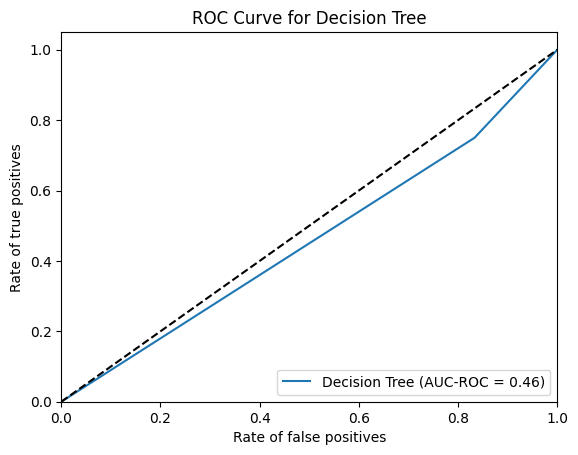

Model: Random Forest
Accuracy: 0.68
AUC-ROC: 0.57
Specificity: 0.00
Precision: 0.71
Recall: 0.94
F1 Score: 0.81
Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.71      0.94      0.81        16

    accuracy                           0.68        22
   macro avg       0.36      0.47      0.41        22
weighted avg       0.52      0.68      0.59        22



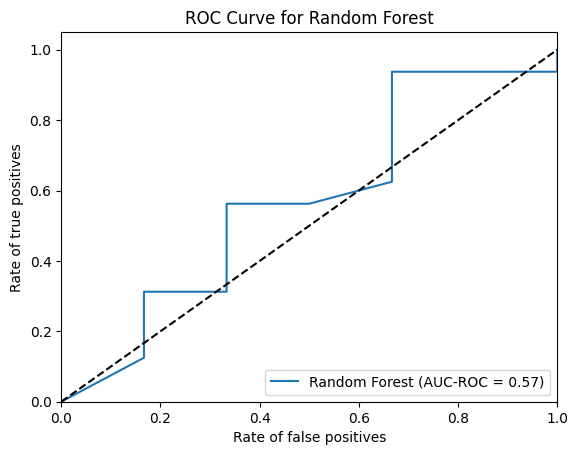

Model: Gradient Boosting
Accuracy: 0.68
AUC-ROC: 0.45
Specificity: 0.17
Precision: 0.74
Recall: 0.88
F1 Score: 0.80
Classification report:
              precision    recall  f1-score   support

         0.0       0.33      0.17      0.22         6
         1.0       0.74      0.88      0.80        16

    accuracy                           0.68        22
   macro avg       0.54      0.52      0.51        22
weighted avg       0.63      0.68      0.64        22



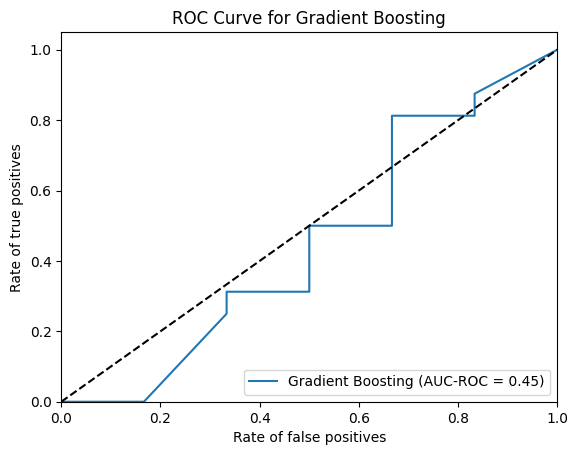

Model: SVM
Accuracy: 0.73
AUC-ROC: 0.43
Specificity: 0.00
Precision: 0.73
Recall: 1.00
F1 Score: 0.84
Classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.00      0.00         6
         1.0       0.73      1.00      0.84        16

    accuracy                           0.73        22
   macro avg       0.86      0.50      0.42        22
weighted avg       0.80      0.73      0.61        22



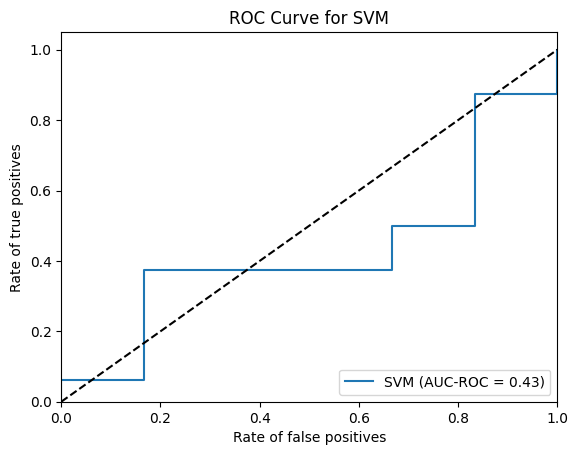

Model: Logistic Regression
Accuracy: 0.55
AUC-ROC: 0.33
Specificity: 0.17
Precision: 0.69
Recall: 0.69
F1 Score: 0.69
Classification report:
              precision    recall  f1-score   support

         0.0       0.17      0.17      0.17         6
         1.0       0.69      0.69      0.69        16

    accuracy                           0.55        22
   macro avg       0.43      0.43      0.43        22
weighted avg       0.55      0.55      0.55        22



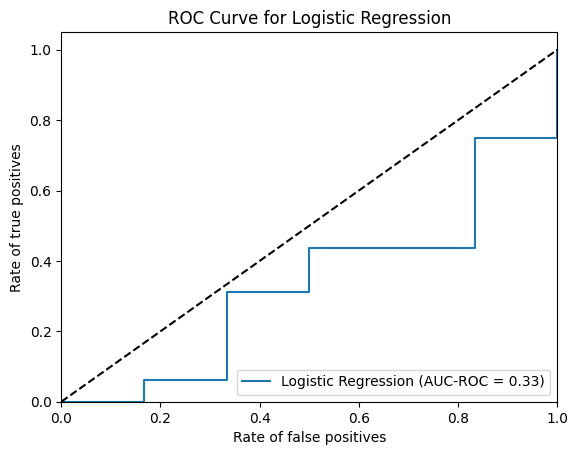

Model: K-Nearest Neighbors
Accuracy: 0.50
AUC-ROC: 0.48
Specificity: 0.00
Precision: 0.65
Recall: 0.69
F1 Score: 0.67
Classification report:
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         6
         1.0       0.65      0.69      0.67        16

    accuracy                           0.50        22
   macro avg       0.32      0.34      0.33        22
weighted avg       0.47      0.50      0.48        22



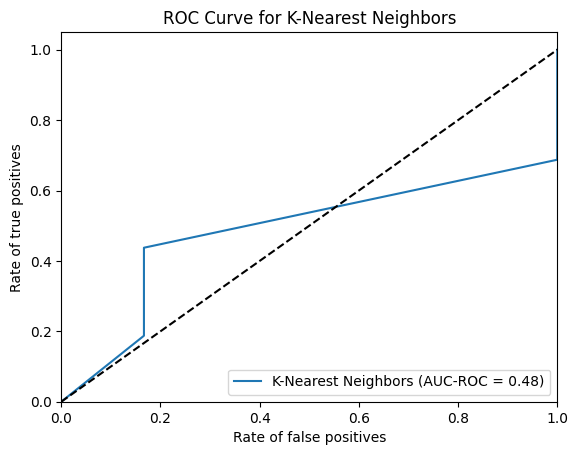

In [46]:
# Training of the following algorithms: Decision Tree Classifier, Random Forest Classifier, Gradient Boosting Classifier,SVM, Decision Tree, Logistic Regression, K-NN

decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

gradient_boosting_model = GradientBoostingClassifier(random_state=42)
gradient_boosting_model.fit(X_train, y_train)

svm_model = SVC(random_state=42, probability=True)
svm_model.fit(X_train, y_train)

tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)

logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

np.random.seed(42)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Performance evaluation
models = [decision_tree_model, random_forest_model, gradient_boosting_model, svm_model, logistic_regression_model, knn_model]
model_names = ["Decision Tree", "Random Forest", "Gradient Boosting", "SVM", "Logistic Regression", "K-Nearest Neighbors"]

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    accuracy = accuracy_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    confusion = confusion_matrix(y_test, y_pred)


    TN, FP, FN, TP = confusion.ravel()
    specificity = TN / (TN + FP)


    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"AUC-ROC: {auc_roc:.2f}")
    print(f"Specificity: {specificity:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, zero_division=True))


    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.figure()
    plt.plot(fpr, tpr, label=f"{name} (AUC-ROC = {auc_roc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Rate of false positives')
    plt.ylabel('Rate of true positives')
    plt.title(f"ROC Curve for {name}")
    plt.legend(loc="lower right")
    plt.show()

Repeated stratified k-fold cross validation - Training

In [47]:
#5-fold cross-validation with 5 repetitions
n_splits = 5
n_repeats = 5
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

scoring = {
    'Accuracy': 'accuracy',
    'AUC-ROC': 'roc_auc',
    'Precision': 'precision',
    'Specificity': make_scorer(calculate_specificity),
    'Recall': 'recall',
    'F1': 'f1'
}


for model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

    accuracy_scores = cv_results['test_Accuracy']
    auc_roc_scores = cv_results['test_AUC-ROC']
    precision_scores = cv_results['test_Precision']
    specificity_scores = cv_results['test_Specificity']
    recall_scores = cv_results['test_Recall']
    f1_scores = cv_results['test_F1']

    std_accuracy = accuracy_scores.std()
    std_auc_roc = auc_roc_scores.std()
    std_precision = precision_scores.std()
    std_specificity = specificity_scores.std()
    std_recall = recall_scores.std()
    std_f1 = f1_scores.std()

    avg_accuracy = accuracy_scores.mean()
    avg_auc_roc = auc_roc_scores.mean()
    avg_precision = precision_scores.mean()
    avg_specificity = specificity_scores.mean()
    avg_recall = recall_scores.mean()
    avg_f1 = f1_scores.mean()

    model_name = type(model).__name__
    print(f"5-fold cross-validation results for {model_name} model:")
    print(f"Accuracy: {avg_accuracy:.2f}, SD = {std_accuracy:.2f}")
    print(f"AUC-ROC: {avg_auc_roc:.2f}, SD = {std_auc_roc:.2f}")
    print(f"Precision: {avg_precision:.2f}, SD = {std_precision:.2f}")
    print(f"Specificity: {avg_specificity:.2f}, SD = {std_specificity:.2f}")
    print(f"Recall: {avg_recall:.2f}, SD = {std_recall:.2f}")
    print(f"F1: {avg_f1:.2f}, SD = {std_f1:.2f}")
    print("\n")

5-fold cross-validation results for DecisionTreeClassifier model:
Accuracy: 0.66, SD = 0.14
AUC-ROC: 0.57, SD = 0.18
Precision: 0.77, SD = 0.12
Specificity: 0.37, SD = 0.32
Recall: 0.77, SD = 0.15
F1: 0.76, SD = 0.10


5-fold cross-validation results for RandomForestClassifier model:
Accuracy: 0.69, SD = 0.10
AUC-ROC: 0.57, SD = 0.17
Precision: 0.74, SD = 0.08
Specificity: 0.11, SD = 0.20
Recall: 0.90, SD = 0.11
F1: 0.81, SD = 0.07


5-fold cross-validation results for GradientBoostingClassifier model:
Accuracy: 0.70, SD = 0.12
AUC-ROC: 0.66, SD = 0.17
Precision: 0.78, SD = 0.10
Specificity: 0.32, SD = 0.31
Recall: 0.83, SD = 0.15
F1: 0.80, SD = 0.09


5-fold cross-validation results for SVC model:
Accuracy: 0.74, SD = 0.05
AUC-ROC: 0.59, SD = 0.17
Precision: 0.74, SD = 0.05
Specificity: 0.00, SD = 0.00
Recall: 1.00, SD = 0.00
F1: 0.85, SD = 0.03


5-fold cross-validation results for LogisticRegression model:
Accuracy: 0.57, SD = 0.13
AUC-ROC: 0.52, SD = 0.15
Precision: 0.72, SD = 0.09

In [48]:
#10-fold cross-validation with 5 repetitions
n_splits = 10
n_repeats = 5
cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

def calculate_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

scoring = {
    'Accuracy': 'accuracy',
    'AUC-ROC': 'roc_auc',
    'Precision': 'precision',
    'Specificity': make_scorer(calculate_specificity),
    'Recall': 'recall',
    'F1': 'f1'
}


for model in models:
    cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

    accuracy_scores = cv_results['test_Accuracy']
    auc_roc_scores = cv_results['test_AUC-ROC']
    precision_scores = cv_results['test_Precision']
    specificity_scores = cv_results['test_Specificity']
    recall_scores = cv_results['test_Recall']
    f1_scores = cv_results['test_F1']

    std_accuracy = accuracy_scores.std()
    std_auc_roc = auc_roc_scores.std()
    std_precision = precision_scores.std()
    std_specificity = specificity_scores.std()
    std_recall = recall_scores.std()
    std_f1 = f1_scores.std()

    avg_accuracy = accuracy_scores.mean()
    avg_auc_roc = auc_roc_scores.mean()
    avg_precision = precision_scores.mean()
    avg_specificity = specificity_scores.mean()
    avg_recall = recall_scores.mean()
    avg_f1 = f1_scores.mean()

    model_name = type(model).__name__
    print(f"10-fold cross-validation results for {model_name} model:")
    print(f"Accuracy: {avg_accuracy:.2f}, SD = {std_accuracy:.2f}")
    print(f"AUC-ROC: {avg_auc_roc:.2f}, SD = {std_auc_roc:.2f}")
    print(f"Precision: {avg_precision:.2f}, SD = {std_precision:.2f}")
    print(f"Specificity: {avg_specificity:.2f}, SD = {std_specificity:.2f}")
    print(f"Recall: {avg_recall:.2f}, SD = {std_recall:.2f}")
    print(f"F1: {avg_f1:.2f}, SD = {std_f1:.2f}")
    print("\n")

10-fold cross-validation results for DecisionTreeClassifier model:
Accuracy: 0.70, SD = 0.18
AUC-ROC: 0.61, SD = 0.23
Precision: 0.80, SD = 0.19
Specificity: 0.43, SD = 0.45
Recall: 0.79, SD = 0.23
F1: 0.77, SD = 0.18


10-fold cross-validation results for RandomForestClassifier model:
Accuracy: 0.70, SD = 0.15
AUC-ROC: 0.65, SD = 0.27
Precision: 0.75, SD = 0.14
Specificity: 0.14, SD = 0.33
Recall: 0.91, SD = 0.15
F1: 0.81, SD = 0.12


10-fold cross-validation results for GradientBoostingClassifier model:
Accuracy: 0.71, SD = 0.18
AUC-ROC: 0.65, SD = 0.26
Precision: 0.80, SD = 0.17
Specificity: 0.42, SD = 0.46
Recall: 0.83, SD = 0.19
F1: 0.80, SD = 0.15


10-fold cross-validation results for SVC model:
Accuracy: 0.74, SD = 0.09
AUC-ROC: 0.62, SD = 0.30
Precision: 0.74, SD = 0.09
Specificity: 0.00, SD = 0.00
Recall: 1.00, SD = 0.00
F1: 0.85, SD = 0.06


10-fold cross-validation results for LogisticRegression model:
Accuracy: 0.58, SD = 0.22
AUC-ROC: 0.57, SD = 0.31
Precision: 0.71, SD =

Search for the best hyperparameters

In [ ]:
#Definition of hyperparameters for each model
hyperparameters = {
    "Decision Tree": {"max_depth": [10, 20, 30, None], "min_samples_split": [2, 5, 10]},
    "Random Forest": {"n_estimators": [10, 50, 100], "max_depth": [10, 20, 30, None], "min_samples_split": [2, 5, 10]},
    "Gradient Boosting": {"n_estimators": [10, 50, 100], "learning_rate": [0.01, 0.1, 1.0], "subsample": [0.5, 0.7, 1.0]},
    "SVM": {"C": [0.1, 1, 10], "gamma": [1, 0.1, 0.01]},
    "Logistic Regression": {"C": [0.1, 1, 10]},
    "K-Nearest Neighbors (KNN)": {"n_neighbors": [3, 5, 11], "weights": ["uniform", "distance"], "metric": ["euclidean", "manhattan"]}
}

#For loop to search for parameters with different methods
for model, model_name in zip(models, model_names):
    print(f"Performing hyperparameter tuning for {model_name}...")

    # Grid Search
    grid_search = GridSearchCV(model, hyperparameters[model_name], cv=10)
    grid_search.fit(X_train, y_train)
    print(f"Best parameters (Grid Search): {grid_search.best_params_}")

    # Randomized Search
    randomized_search = RandomizedSearchCV(model, hyperparameters[model_name], cv=10)
    randomized_search.fit(X_train, y_train)
    print(f"Best parameters (Randomized Search): {randomized_search.best_params_}")

    # Bayesian Optimization
    bayesian_search = BayesSearchCV(model, hyperparameters[model_name], cv=10)
    bayesian_search.fit(X_train, y_train)
    print(f"Best parameters (Bayesian Optimization): {bayesian_search.best_params_}")


Performing hyperparameter tuning for Decision Tree...
Best parameters (Grid Search): {'max_depth': 10, 'min_samples_split': 2}
Best parameters (Randomized Search): {'min_samples_split': 2, 'max_depth': None}


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 10] before, using random point [10, 5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 5] before, using random point [20, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 2] before, using random point [20, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 2] before, using random point [None, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 2] before, using random point [None, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/o

Best parameters (Bayesian Optimization): OrderedDict([('max_depth', 10), ('min_samples_split', 2)])
Performing hyperparameter tuning for Random Forest...
Best parameters (Grid Search): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
Best parameters (Randomized Search): {'n_estimators': 100, 'min_samples_split': 10, 'max_depth': 10}


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 5, 100] before, using random point [20, 10, 50]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2, 10] before, using random point [None, 5, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 2, 10] before, using random point [30, 5, 50]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2, 50] before, using random point [10, 5, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2, 10] before, using random point [30, 5, 50]
  warnings.warn(
/usr/local/

Best parameters (Bayesian Optimization): OrderedDict([('max_depth', 30), ('min_samples_split', 2), ('n_estimators', 10)])
Performing hyperparameter tuning for Gradient Boosting...
Best parameters (Grid Search): {'learning_rate': 0.01, 'n_estimators': 10, 'subsample': 0.5}
Best parameters (Randomized Search): {'subsample': 0.7, 'n_estimators': 10, 'learning_rate': 1.0}


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 100, 0.5] before, using random point [0.01, 10, 0.5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 100, 0.5] before, using random point [0.01, 50, 1.0]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 100, 0.7] before, using random point [0.1, 100, 0.5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 100, 0.7] before, using random point [0.1, 50, 0.5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 10, 0.7] before, using random point [0.01, 10

Best parameters (Bayesian Optimization): OrderedDict([('learning_rate', 0.01), ('n_estimators', 10), ('subsample', 1.0)])
Performing hyperparameter tuning for SVM...
Best parameters (Grid Search): {'C': 0.1, 'gamma': 1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters (Randomized Search): {'gamma': 1, 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1] before, using random point [1, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.1] before, using random point [1, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 0.1] before, using random point [10, 0.01]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 0.01] before, using random point [1, 0.1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 0.01] before, using random point [0.1, 0.01]
  warnings.warn(
/usr/local/lib/python3.10/dist-package

Best parameters (Bayesian Optimization): OrderedDict([('C', 1), ('gamma', 1)])
Performing hyperparameter tuning for Logistic Regression...
Best parameters (Grid Search): {'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters (Randomized Search): {'C': 0.1}


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [0.1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning:

Best parameters (Bayesian Optimization): OrderedDict([('C', 0.1)])
Performing hyperparameter tuning for K-Nearest Neighbors (KNN)...
Best parameters (Grid Search): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best parameters (Randomized Search): {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'}


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 11, 'uniform'] before, using random point ['euclidean', 5, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 11, 'uniform'] before, using random point ['euclidean', 5, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 3, 'uniform'] before, using random point ['euclidean', 3, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'uniform'] before, using random point ['manhattan', 11, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserW

Best parameters (Bayesian Optimization): OrderedDict([('metric', 'euclidean'), ('n_neighbors', 11), ('weights', 'distance')])


In [ ]:
#Cross-validation with 5 repetitions for optimized models
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

specificity_scorer = make_scorer(specificity_score)

scoring_metrics = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc',
    'specificity': specificity_scorer
}

search_methods = [GridSearchCV, RandomizedSearchCV, BayesSearchCV]


for model, model_name in zip(models, model_names):
    print(f"\nEvaluation of {model_name} with cross-validation:")

    for cv in [5, 10]:
        print(f"\n{cv}-fold cross-validation:")

        for search_method in search_methods:
            search = search_method(model, hyperparameters[model_name], cv=cv)
            search.fit(X_train, y_train)
            best_params = search.best_params_
            print(f"\nBest hyperparameters ({search_method.__name__}): {best_params}")

            model.set_params(**best_params)

            cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring_metrics)


            print(f"\nResults of cross-validation for {model_name} with {cv}-fold:")
            for metric, scores in cv_results.items():
                if 'test_' in metric:
                    mean_score = scores.mean()
                    std_score = scores.std()
                    print(f"{metric.split('_')[-1].capitalize()}: mean = {mean_score:.2f}, SD = {std_score:.2f}")


Evaluation of Decision Tree with cross-validation:

5-fold cross-validation:

Best hyperparameters (GridSearchCV): {'max_depth': 10, 'min_samples_split': 5}

Results of cross-validation for Decision Tree with 5-fold:
Accuracy: mean = 0.66, SD = 0.12
Precision: mean = 0.81, SD = 0.12
Recall: mean = 0.73, SD = 0.16
F1: mean = 0.75, SD = 0.10
Auc: mean = 0.60, SD = 0.12
Specificity: mean = 0.50, SD = 0.26

Best hyperparameters (RandomizedSearchCV): {'min_samples_split': 5, 'max_depth': 20}

Results of cross-validation for Decision Tree with 5-fold:
Accuracy: mean = 0.66, SD = 0.12
Precision: mean = 0.81, SD = 0.12
Recall: mean = 0.73, SD = 0.16
F1: mean = 0.75, SD = 0.10
Auc: mean = 0.60, SD = 0.12
Specificity: mean = 0.50, SD = 0.26


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2] before, using random point [20, 5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 5] before, using random point [None, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 10] before, using random point [20, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 10] before, using random point [30, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 5] before, using random point [10, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/opt


Best hyperparameters (BayesSearchCV): OrderedDict([('max_depth', 30), ('min_samples_split', 5)])

Results of cross-validation for Decision Tree with 5-fold:
Accuracy: mean = 0.66, SD = 0.12
Precision: mean = 0.81, SD = 0.12
Recall: mean = 0.73, SD = 0.16
F1: mean = 0.75, SD = 0.10
Auc: mean = 0.60, SD = 0.12
Specificity: mean = 0.50, SD = 0.26

10-fold cross-validation:

Best hyperparameters (GridSearchCV): {'max_depth': 10, 'min_samples_split': 2}

Results of cross-validation for Decision Tree with 10-fold:
Accuracy: mean = 0.72, SD = 0.20
Precision: mean = 0.85, SD = 0.17
Recall: mean = 0.75, SD = 0.26
F1: mean = 0.77, SD = 0.21
Auc: mean = 0.68, SD = 0.23
Specificity: mean = 0.60, SD = 0.44

Best hyperparameters (RandomizedSearchCV): {'min_samples_split': 2, 'max_depth': 20}

Results of cross-validation for Decision Tree with 10-fold:
Accuracy: mean = 0.72, SD = 0.20
Precision: mean = 0.85, SD = 0.17
Recall: mean = 0.75, SD = 0.26
F1: mean = 0.77, SD = 0.21
Auc: mean = 0.68, SD = 0

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 10] before, using random point [10, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 5] before, using random point [None, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 2] before, using random point [None, 2]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 5] before, using random point [None, 5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 10] before, using random point [30, 5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk


Best hyperparameters (BayesSearchCV): OrderedDict([('max_depth', 20), ('min_samples_split', 10)])

Results of cross-validation for Decision Tree with 10-fold:
Accuracy: mean = 0.72, SD = 0.18
Precision: mean = 0.83, SD = 0.18
Recall: mean = 0.78, SD = 0.22
F1: mean = 0.78, SD = 0.17
Auc: mean = 0.70, SD = 0.23
Specificity: mean = 0.60, SD = 0.44

Evaluation of Random Forest with cross-validation:

5-fold cross-validation:

Best hyperparameters (GridSearchCV): {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 10}

Results of cross-validation for Random Forest with 5-fold:
Accuracy: mean = 0.72, SD = 0.12
Precision: mean = 0.79, SD = 0.09
Recall: mean = 0.87, SD = 0.14
F1: mean = 0.82, SD = 0.08
Auc: mean = 0.52, SD = 0.19
Specificity: mean = 0.33, SD = 0.28

Best hyperparameters (RandomizedSearchCV): {'n_estimators': 10, 'min_samples_split': 10, 'max_depth': 10}

Results of cross-validation for Random Forest with 5-fold:
Accuracy: mean = 0.72, SD = 0.12
Precision: mean = 0.79,

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 5, 50] before, using random point [10, 2, 50]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 5, 50] before, using random point [20, 5, 50]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 5, 100] before, using random point [20, 2, 50]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [30, 2, 10] before, using random point [10, 2, 100]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [None, 10, 10] before, using random point [20, 5, 100]
  warnings.warn(
/usr/lo


Best hyperparameters (BayesSearchCV): OrderedDict([('max_depth', 20), ('min_samples_split', 10), ('n_estimators', 10)])

Results of cross-validation for Random Forest with 5-fold:
Accuracy: mean = 0.72, SD = 0.12
Precision: mean = 0.79, SD = 0.09
Recall: mean = 0.87, SD = 0.14
F1: mean = 0.82, SD = 0.08
Auc: mean = 0.52, SD = 0.19
Specificity: mean = 0.33, SD = 0.28

10-fold cross-validation:

Best hyperparameters (GridSearchCV): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}

Results of cross-validation for Random Forest with 10-fold:
Accuracy: mean = 0.76, SD = 0.15
Precision: mean = 0.88, SD = 0.12
Recall: mean = 0.81, SD = 0.23
F1: mean = 0.81, SD = 0.14
Auc: mean = 0.67, SD = 0.23
Specificity: mean = 0.60, SD = 0.44

Best hyperparameters (RandomizedSearchCV): {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 20}

Results of cross-validation for Random Forest with 10-fold:
Accuracy: mean = 0.76, SD = 0.15
Precision: mean = 0.88, SD = 0.12
Recall: mean = 0.81

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 10, 10] before, using random point [10, 2, 10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 5, 10] before, using random point [None, 2, 50]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 2, 10] before, using random point [20, 10, 50]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 5, 50] before, using random point [None, 10, 100]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [20, 10, 50] before, using random point [None, 5, 100]
  warnings.warn(
/us


Best hyperparameters (BayesSearchCV): OrderedDict([('max_depth', 20), ('min_samples_split', 2), ('n_estimators', 10)])

Results of cross-validation for Random Forest with 10-fold:
Accuracy: mean = 0.76, SD = 0.15
Precision: mean = 0.88, SD = 0.12
Recall: mean = 0.81, SD = 0.23
F1: mean = 0.81, SD = 0.14
Auc: mean = 0.67, SD = 0.23
Specificity: mean = 0.60, SD = 0.44

Evaluation of Gradient Boosting with cross-validation:

5-fold cross-validation:

Best hyperparameters (GridSearchCV): {'learning_rate': 1.0, 'n_estimators': 50, 'subsample': 0.5}

Results of cross-validation for Gradient Boosting with 5-fold:
Accuracy: mean = 0.80, SD = 0.13
Precision: mean = 0.86, SD = 0.09
Recall: mean = 0.86, SD = 0.13
F1: mean = 0.86, SD = 0.10
Auc: mean = 0.69, SD = 0.17
Specificity: mean = 0.63, SD = 0.22

Best hyperparameters (RandomizedSearchCV): {'subsample': 0.7, 'n_estimators': 100, 'learning_rate': 0.01}

Results of cross-validation for Gradient Boosting with 5-fold:
Accuracy: mean = 0.74, SD

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 50, 0.5] before, using random point [1.0, 10, 1.0]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 50, 0.5] before, using random point [0.01, 100, 0.7]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 50, 0.7] before, using random point [0.01, 10, 0.5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 50, 0.5] before, using random point [0.01, 50, 0.5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1.0, 50, 0.5] before, using random point [0.1, 100, 0


Best hyperparameters (BayesSearchCV): OrderedDict([('learning_rate', 1.0), ('n_estimators', 50), ('subsample', 0.5)])

Results of cross-validation for Gradient Boosting with 5-fold:
Accuracy: mean = 0.80, SD = 0.13
Precision: mean = 0.86, SD = 0.09
Recall: mean = 0.86, SD = 0.13
F1: mean = 0.86, SD = 0.10
Auc: mean = 0.69, SD = 0.17
Specificity: mean = 0.63, SD = 0.22

10-fold cross-validation:

Best hyperparameters (GridSearchCV): {'learning_rate': 0.01, 'n_estimators': 10, 'subsample': 0.5}

Results of cross-validation for Gradient Boosting with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.74, SD = 0.09
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.06
Auc: mean = 0.55, SD = 0.21
Specificity: mean = 0.00, SD = 0.00

Best hyperparameters (RandomizedSearchCV): {'subsample': 1.0, 'n_estimators': 10, 'learning_rate': 0.01}

Results of cross-validation for Gradient Boosting with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.74, SD = 0.09
Recall: m

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 10, 0.5] before, using random point [0.1, 100, 0.5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.01, 100, 0.5] before, using random point [1.0, 100, 0.5]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 100, 0.5] before, using random point [0.1, 100, 0.7]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 50, 1.0] before, using random point [1.0, 50, 0.7]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 100, 0.5] before, using random point [0.1, 100,


Best hyperparameters (BayesSearchCV): OrderedDict([('learning_rate', 0.01), ('n_estimators', 50), ('subsample', 0.5)])

Results of cross-validation for Gradient Boosting with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.74, SD = 0.09
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.06
Auc: mean = 0.54, SD = 0.26
Specificity: mean = 0.00, SD = 0.00

Evaluation of SVM with cross-validation:

5-fold cross-validation:

Best hyperparameters (GridSearchCV): {'C': 0.1, 'gamma': 1}

Results of cross-validation for SVM with 5-fold:
Accuracy: mean = 0.74, SD = 0.05
Precision: mean = 0.74, SD = 0.05
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.03
Auc: mean = 0.69, SD = 0.04
Specificity: mean = 0.00, SD = 0.00

Best hyperparameters (RandomizedSearchCV): {'gamma': 1, 'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results of cross-validation for SVM with 5-fold:
Accuracy: mean = 0.74, SD = 0.05
Precision: mean = 0.74, SD = 0.05
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.03
Auc: mean = 0.69, SD = 0.04
Specificity: mean = 0.00, SD = 0.00


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 1] before, using random point [1, 0.01]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 0.01] before, using random point [10, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 0.01] before, using random point [10, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 1] before, using random point [0.1, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 1] before, using random point [0.1, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skop


Best hyperparameters (BayesSearchCV): OrderedDict([('C', 0.1), ('gamma', 0.01)])

Results of cross-validation for SVM with 5-fold:
Accuracy: mean = 0.74, SD = 0.05
Precision: mean = 0.74, SD = 0.05
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.03
Auc: mean = 0.56, SD = 0.21
Specificity: mean = 0.00, SD = 0.00

10-fold cross-validation:

Best hyperparameters (GridSearchCV): {'C': 0.1, 'gamma': 1}

Results of cross-validation for SVM with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.74, SD = 0.09
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.06
Auc: mean = 0.74, SD = 0.15
Specificity: mean = 0.00, SD = 0.00


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters (RandomizedSearchCV): {'gamma': 1, 'C': 0.1}

Results of cross-validation for SVM with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.74, SD = 0.09
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.06
Auc: mean = 0.74, SD = 0.15
Specificity: mean = 0.00, SD = 0.00


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 0.01] before, using random point [1, 0.01]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1, 1] before, using random point [0.1, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 1] before, using random point [1, 0.01]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1, 0.1] before, using random point [0.1, 1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10, 1] before, using random point [0.1, 0.1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sk


Best hyperparameters (BayesSearchCV): OrderedDict([('C', 0.1), ('gamma', 0.01)])

Results of cross-validation for SVM with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.74, SD = 0.09
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.06
Auc: mean = 0.50, SD = 0.27
Specificity: mean = 0.00, SD = 0.00

Evaluation of Logistic Regression with cross-validation:

5-fold cross-validation:

Best hyperparameters (GridSearchCV): {'C': 0.1}

Results of cross-validation for Logistic Regression with 5-fold:
Accuracy: mean = 0.70, SD = 0.14
Precision: mean = 0.75, SD = 0.09
Recall: mean = 0.89, SD = 0.13
F1: mean = 0.81, SD = 0.10
Auc: mean = 0.59, SD = 0.26
Specificity: mean = 0.17, SD = 0.21

Best hyperparameters (RandomizedSearchCV): {'C': 0.1}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Results of cross-validation for Logistic Regression with 5-fold:
Accuracy: mean = 0.70, SD = 0.14
Precision: mean = 0.75, SD = 0.09
Recall: mean = 0.89, SD = 0.13
F1: mean = 0.81, SD = 0.10
Auc: mean = 0.59, SD = 0.26
Specificity: mean = 0.17, SD = 0.21


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [0.1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [0.1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarni


Best hyperparameters (BayesSearchCV): OrderedDict([('C', 0.1)])

Results of cross-validation for Logistic Regression with 5-fold:
Accuracy: mean = 0.70, SD = 0.14
Precision: mean = 0.75, SD = 0.09
Recall: mean = 0.89, SD = 0.13
F1: mean = 0.81, SD = 0.10
Auc: mean = 0.59, SD = 0.26
Specificity: mean = 0.17, SD = 0.21

10-fold cross-validation:

Best hyperparameters (GridSearchCV): {'C': 0.1}

Results of cross-validation for Logistic Regression with 10-fold:
Accuracy: mean = 0.68, SD = 0.13
Precision: mean = 0.73, SD = 0.08
Recall: mean = 0.89, SD = 0.18
F1: mean = 0.79, SD = 0.11
Auc: mean = 0.52, SD = 0.28
Specificity: mean = 0.05, SD = 0.15


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters (RandomizedSearchCV): {'C': 0.1}

Results of cross-validation for Logistic Regression with 10-fold:
Accuracy: mean = 0.68, SD = 0.13
Precision: mean = 0.73, SD = 0.08
Recall: mean = 0.89, SD = 0.18
F1: mean = 0.79, SD = 0.11
Auc: mean = 0.52, SD = 0.28
Specificity: mean = 0.05, SD = 0.15


/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [10] before, using random point [1]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [1] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point [0.1] before, using random point [10]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarnin


Best hyperparameters (BayesSearchCV): OrderedDict([('C', 0.1)])

Results of cross-validation for Logistic Regression with 10-fold:
Accuracy: mean = 0.68, SD = 0.13
Precision: mean = 0.73, SD = 0.08
Recall: mean = 0.89, SD = 0.18
F1: mean = 0.79, SD = 0.11
Auc: mean = 0.52, SD = 0.28
Specificity: mean = 0.05, SD = 0.15

Evaluation of K-Nearest Neighbors (KNN) with cross-validation:

5-fold cross-validation:

Best hyperparameters (GridSearchCV): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Results of cross-validation for K-Nearest Neighbors (KNN) with 5-fold:
Accuracy: mean = 0.74, SD = 0.05
Precision: mean = 0.75, SD = 0.07
Recall: mean = 0.97, SD = 0.05
F1: mean = 0.85, SD = 0.03
Auc: mean = 0.66, SD = 0.18
Specificity: mean = 0.10, SD = 0.20

Best hyperparameters (RandomizedSearchCV): {'weights': 'distance', 'n_neighbors': 11, 'metric': 'euclidean'}

Results of cross-validation for K-Nearest Neighbors (KNN) with 5-fold:
Accuracy: mean = 0.74, SD = 0.05
Precision:

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 5, 'distance'] before, using random point ['manhattan', 11, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 11, 'distance'] before, using random point ['euclidean', 5, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 11, 'distance'] before, using random point ['manhattan', 5, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['euclidean', 11, 'distance'] before, using random point ['euclidean', 11, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: 


Best hyperparameters (BayesSearchCV): OrderedDict([('metric', 'euclidean'), ('n_neighbors', 11), ('weights', 'uniform')])

Results of cross-validation for K-Nearest Neighbors (KNN) with 5-fold:
Accuracy: mean = 0.74, SD = 0.05
Precision: mean = 0.75, SD = 0.07
Recall: mean = 0.97, SD = 0.05
F1: mean = 0.85, SD = 0.03
Auc: mean = 0.66, SD = 0.18
Specificity: mean = 0.10, SD = 0.20

10-fold cross-validation:

Best hyperparameters (GridSearchCV): {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}

Results of cross-validation for K-Nearest Neighbors (KNN) with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.76, SD = 0.12
Recall: mean = 0.97, SD = 0.07
F1: mean = 0.84, SD = 0.06
Auc: mean = 0.64, SD = 0.27
Specificity: mean = 0.10, SD = 0.30

Best hyperparameters (RandomizedSearchCV): {'weights': 'uniform', 'n_neighbors': 11, 'metric': 'manhattan'}

Results of cross-validation for K-Nearest Neighbors (KNN) with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision

/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 3, 'uniform'] before, using random point ['euclidean', 11, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 11, 'uniform'] before, using random point ['euclidean', 5, 'distance']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 11, 'uniform'] before, using random point ['manhattan', 5, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserWarning: The objective has been evaluated at point ['manhattan', 5, 'uniform'] before, using random point ['euclidean', 3, 'uniform']
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skopt/optimizer/optimizer.py:517: UserW


Best hyperparameters (BayesSearchCV): OrderedDict([('metric', 'manhattan'), ('n_neighbors', 11), ('weights', 'distance')])

Results of cross-validation for K-Nearest Neighbors (KNN) with 10-fold:
Accuracy: mean = 0.74, SD = 0.09
Precision: mean = 0.74, SD = 0.09
Recall: mean = 1.00, SD = 0.00
F1: mean = 0.85, SD = 0.06
Auc: mean = 0.68, SD = 0.27
Specificity: mean = 0.00, SD = 0.00


#Results of the best 2 optimized models
I chose Decision Tree (DT) and Random Forest (RF) because they performed best in the 10-fold cross validation in all metrics evaluated.
### **DECISION TREE (DT)**
```
Best hyperparameters (GridSearchCV): {'max_depth': 10, 'min_samples_split': 2}
Best hyperparameters (RandomizedSearchCV): {'min_samples_split': 2, 'max_depth': 20}
Best hyperparameters (BayesSearchCV): OrderedDict([('max_depth', 20), ('min_samples_split', 10)])
Results of 10-fold cross-validation for Decision Tree:
Accuracy: mean = 0.72, SD = 0.20
Precision: mean = 0.85, SD = 0.17
Recall: mean = 0.75, SD = 0.26
F1: mean = 0.77, SD = 0.21
AUC-ROC: mean = 0.68, SD = 0.23
Specificity: mean = 0.60, SD = 0.44
```

### **RANDOM FOREST (RF)**
```
Best hyperparameters (GridSearchCV): {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
Best hyperparameters (RandomizedSearchCV): {'n_estimators': 10, 'min_samples_split': 2, 'max_depth': 20}
Best hyperparameters (BayesSearchCV): OrderedDict([('max_depth', 20), ('min_samples_split', 2), ('n_estimators', 10)])
Results of 10-fold cross-validation for Random Forest:
Accuracy: mean = 0.76, SD = 0.15
Precision: mean = 0.88, SD = 0.12
Recall: mean = 0.81, SD = 0.23
F1: mean = 0.81, SD = 0.14
AUC-ROC: mean = 0.67, SD = 0.23
Specificity: mean = 0.60, SD = 0.44
```

Since all three methods give the same values, I choose to use BayesianSearchCV since it is the most robust.


# Testing





Decision Tree (DT)

Evaluation metrics for testing:
Accuracy: 0.59
ROC-AUC: 0.46
Precision: 0.71
Recall: 0.75
F1 Score: 0.73
Specificity: 0.17

Classification report for testing:
              precision    recall  f1-score   support

         0.0       0.20      0.17      0.18         6
         1.0       0.71      0.75      0.73        16

    accuracy                           0.59        22
   macro avg       0.45      0.46      0.45        22
weighted avg       0.57      0.59      0.58        22



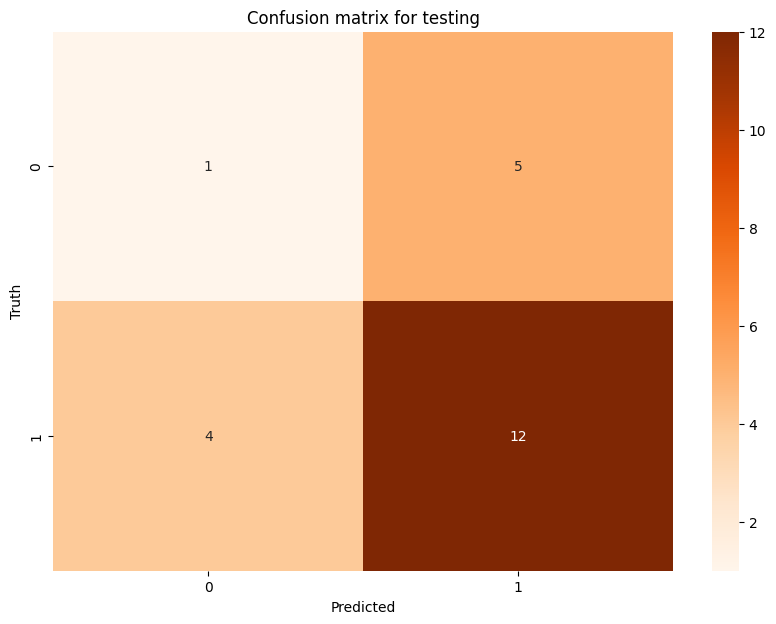

In [49]:
#DT (BayesSearchCV)
DT_params = {'max_depth': 20, 'min_samples_split': 10}
DT_bestmodel = DecisionTreeClassifier(**DT_params, random_state=42)
DT_bestmodel.fit(X_train, y_train)

# Predictions for testing set
y_pred_complete = DT_bestmodel.predict(X_test)
y_pred_complete_proba = DT_bestmodel.predict_proba(X_test)[:, 1]

# Predictions for training set
y_pred_train = DT_bestmodel.predict(X_train)

# Evaluation metrics for test set
accuracy_complete = accuracy_score(y_test, y_pred_complete)
roc_auc_complete = roc_auc_score(y_test, y_pred_complete_proba)
precision_complete = precision_score(y_test, y_pred_complete)
recall_complete = recall_score(y_test, y_pred_complete)
f1_complete = f1_score(y_test, y_pred_complete)
conf_matrix_complete = confusion_matrix(y_test, y_pred_complete)
tn_complete, fp_complete, fn_complete, tp_complete = conf_matrix_complete.ravel()
specificity_complete = tn_complete / (tn_complete + fp_complete)

print("Evaluation metrics for testing:")
print(f'Accuracy: {accuracy_complete:.2f}')
print(f'ROC-AUC: {roc_auc_complete:.2f}')
print(f'Precision: {precision_complete:.2f}')
print(f'Recall: {recall_complete:.2f}')
print(f'F1 Score: {f1_complete:.2f}')
print(f'Specificity: {specificity_complete:.2f}')

# Classification report for test set
report_complete = classification_report(y_test, y_pred_complete, zero_division=True)
print("\nClassification report for testing:")
print(report_complete)

# Confusion matrix for test set
conf_matrix_complete = confusion_matrix(y_test, y_pred_complete)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_complete, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for testing')
plt.show()

**Best model** - Random Forest (RF)

Evaluation metrics for testing:
Accuracy: 0.77
ROC-AUC: 0.72
Precision: 0.79
Recall: 0.94
F1 Score: 0.86
Specificity: 0.33

Classification report for testing:
              precision    recall  f1-score   support

         0.0       0.67      0.33      0.44         6
         1.0       0.79      0.94      0.86        16

    accuracy                           0.77        22
   macro avg       0.73      0.64      0.65        22
weighted avg       0.76      0.77      0.74        22



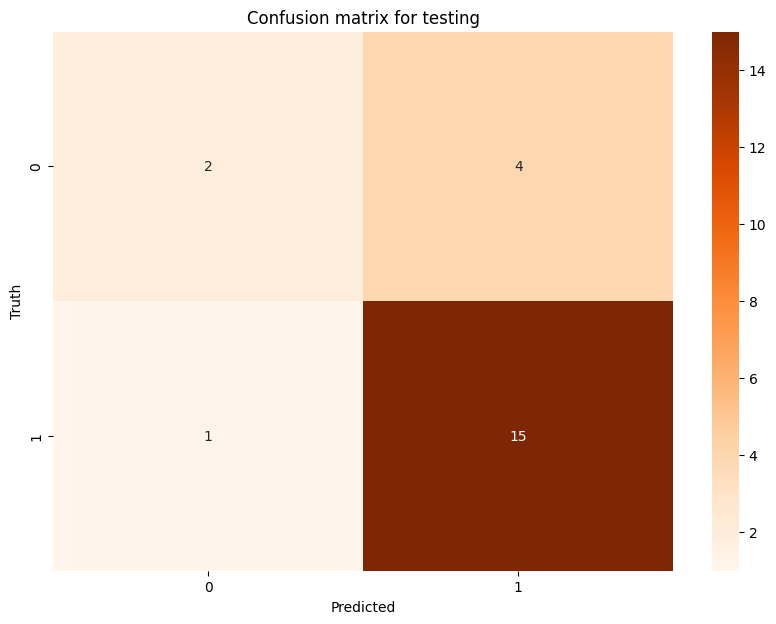

In [50]:
#RF (BayesSearchCV)
RF_params = {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 10}
RF_bestmodel = RandomForestClassifier(**RF_params, random_state=42)
RF_bestmodel.fit(X_train, y_train)

# Predictions for test set
y_pred_complete = RF_bestmodel.predict(X_test)
y_pred_complete_proba = RF_bestmodel.predict_proba(X_test)[:, 1]

# Predictions for training set
y_pred_train = RF_bestmodel.predict(X_train)

# Evaluation metrics for test set
accuracy_complete = accuracy_score(y_test, y_pred_complete)
roc_auc_complete = roc_auc_score(y_test, y_pred_complete_proba)
precision_complete = precision_score(y_test, y_pred_complete)
recall_complete = recall_score(y_test, y_pred_complete)
f1_complete = f1_score(y_test, y_pred_complete)
conf_matrix_complete = confusion_matrix(y_test, y_pred_complete)
tn_complete, fp_complete, fn_complete, tp_complete = conf_matrix_complete.ravel()
specificity_complete = tn_complete / (tn_complete + fp_complete)

print("Evaluation metrics for testing:")
print(f'Accuracy: {accuracy_complete:.2f}')
print(f'ROC-AUC: {roc_auc_complete:.2f}')
print(f'Precision: {precision_complete:.2f}')
print(f'Recall: {recall_complete:.2f}')
print(f'F1 Score: {f1_complete:.2f}')
print(f'Specificity: {specificity_complete:.2f}')

# Classification report for test set
report_complete = classification_report(y_test, y_pred_complete, zero_division=True)
print("\nClassification report for testing:")
print(report_complete)

# Confusion matrix for test set
conf_matrix_complete = confusion_matrix(y_test, y_pred_complete)

# Plot confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix_complete, annot=True, fmt='d', cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for testing')
plt.show()

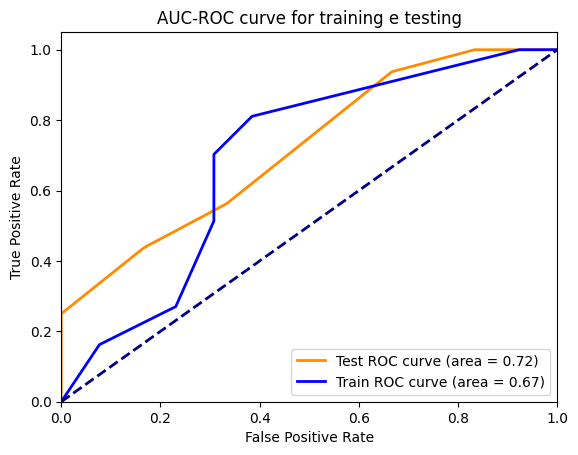

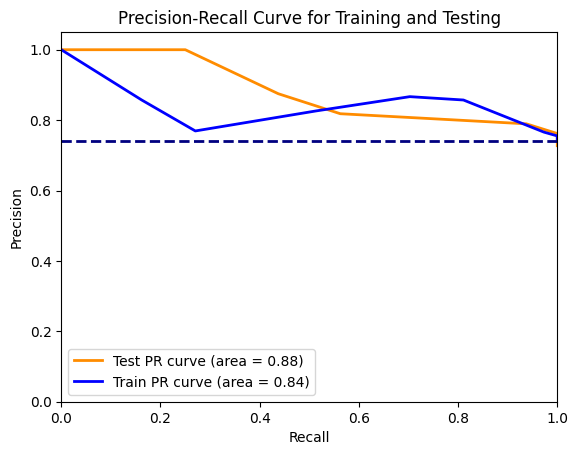

In [ ]:
#Training-test graphs: ROC curve and PR for the best model
best_params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 10}
RF_bestmodel = RandomForestClassifier(**best_params, random_state=42)

cv_results_10 = cross_validate(RF_bestmodel, X_train, y_train, cv=10, scoring='roc_auc', return_train_score=False)
mean_auc_roc_10 = cv_results_10['test_score'].mean()
RF_bestmodel.fit(X_train, y_train)

# Predictions for the test set
y_pred_proba_test = RF_bestmodel.predict_proba(X_test)[:, 1]
y_pred_proba_train = RF_bestmodel.predict_proba(X_train)[:, 1]

# ROC curve for the test set
fpr_test, tpr_test, _ = roc_curve(y_test, y_pred_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# ROC curve for the training set
y_pred_proba_train = cross_val_predict(RF_bestmodel, X_train, y_train, cv=10, method='predict_proba')[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train, y_pred_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# ROC curve for training-testing
plt.figure()
lw = 2
plt.plot(fpr_test, tpr_test, color='darkorange', lw=lw, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot(fpr_train, tpr_train, color='blue', lw=lw, label='Train ROC curve (area = %0.2f)' % mean_auc_roc_10)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC curve for training e testing')
plt.legend(loc="lower right")
plt.show()

# PR for training and testing
precision_test, recall_test, _ = precision_recall_curve(y_test, y_pred_proba_test)
pr_auc_test = auc(recall_test, precision_test)

precision_train, recall_train, _ = precision_recall_curve(y_train, y_pred_proba_train)
pr_auc_train = auc(recall_train, precision_train)

# Calculation of the prevalence of the positive class - precision
improvement_prevalence = y_train.sum() / len(y_train)

# PR curve for training-testing
plt.figure()
lw = 2
plt.plot(recall_test, precision_test, color='darkorange', lw=lw, label='Test PR curve (area = %0.2f)' % pr_auc_test)
plt.plot(recall_train, precision_train, color='blue', lw=lw, label='Train PR curve (area = %0.2f)' % pr_auc_train)
plt.plot([0, 1], [improvement_prevalence, improvement_prevalence], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Training and Testing')
plt.legend(loc="lower left")
plt.show()


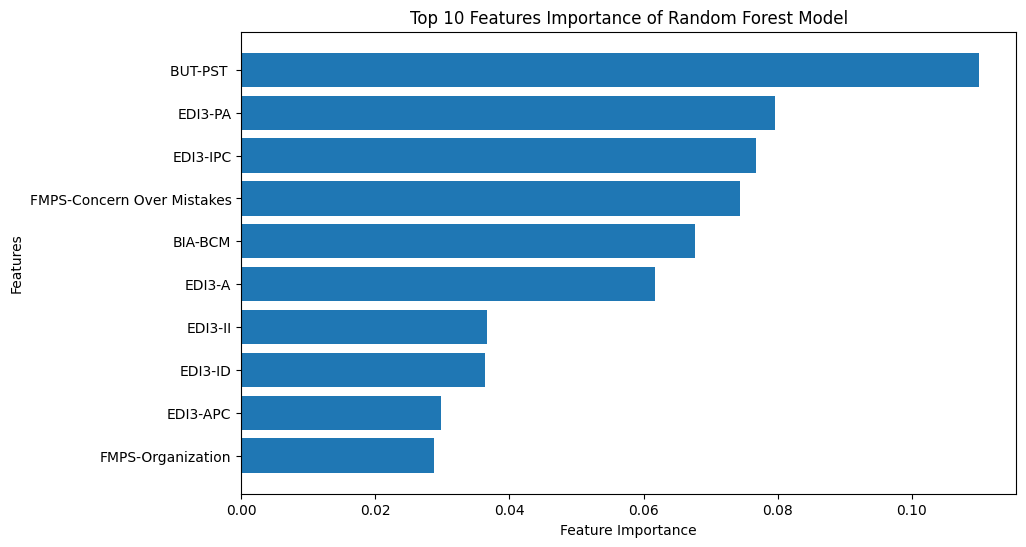

In [ ]:
#Importance features for RF
def plot_top_10_feature_importance(model, feature_names):
    feature_importance = model.feature_importances_
    sorted_idx = np.argsort(feature_importance)[::-1][:10]
    top_feature_names = [feature_names[i] for i in sorted_idx]

    plt.figure(figsize=(10, 6))
    plt.barh(range(10), feature_importance[sorted_idx], align='center')
    plt.yticks(np.arange(10), top_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title('Top 10 Features Importance of Random Forest Model')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_10_feature_importance(RF_bestmodel, df_X.columns)

#**XAI - SHAP post**

In [51]:
pip install shap

In [52]:
import shap

In [53]:
#The most important features of class 1.0 based on the average positive shap values
best_params = {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 10}
RF_bestmodel = RandomForestClassifier(**best_params, random_state=42)

model= RF_bestmodel.fit(df_X, df_Y)
explainer = shap.TreeExplainer(model, df_X)
shap_values = explainer(df_X, check_additivity=False)

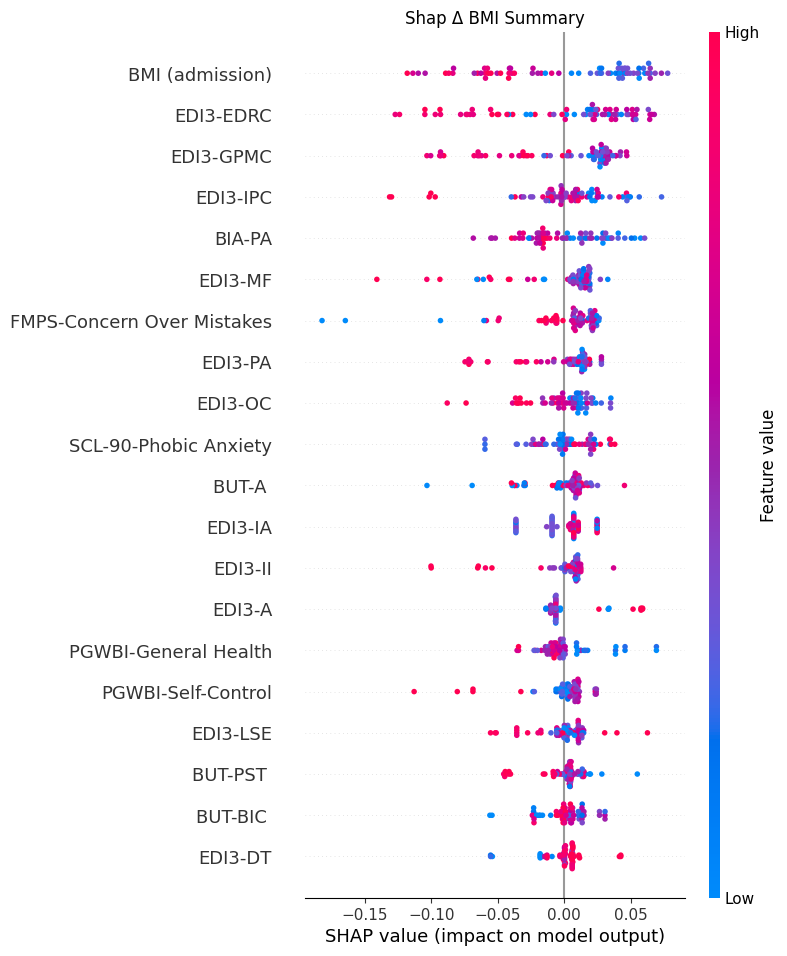

In [ ]:
##SHAP Summary Plot for the positive class (class 0, positive delta BMI)
shap.summary_plot(shap_values[:,:,1], feature_names= np.array(var), title="Shap Δ BMI Summary", show=False)
plt.title("Shap Δ BMI Summary")
plt.show()

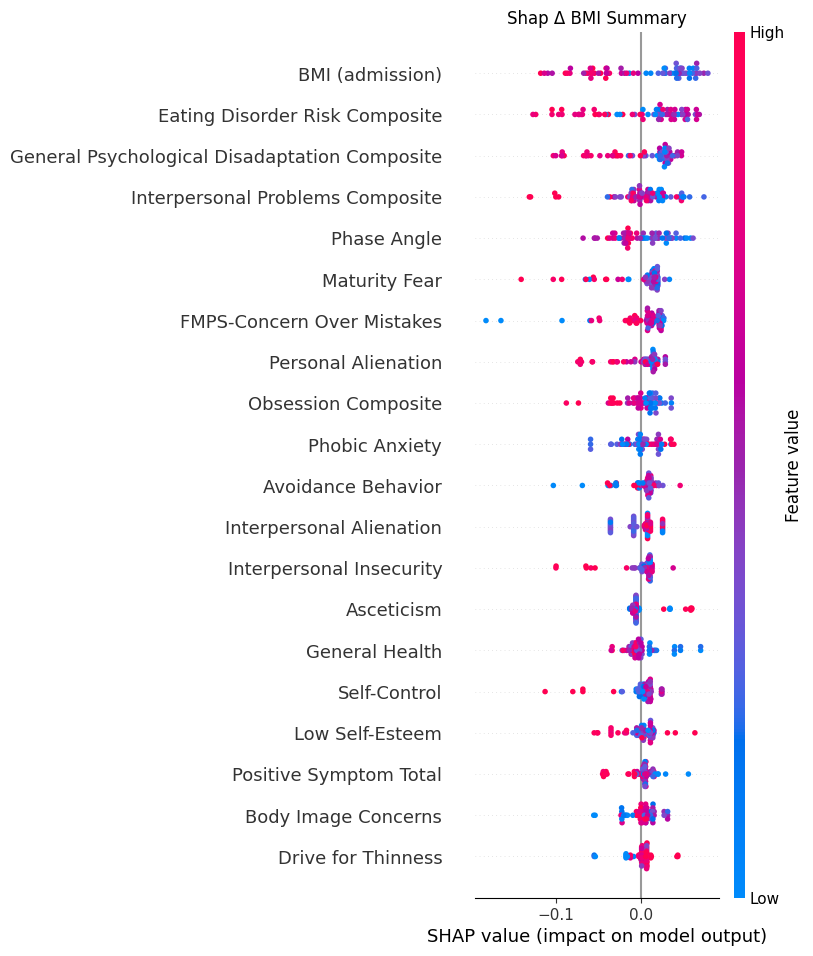

In [54]:
##SHAP Summary Plot for the positive class (class 0, positive delta BMI)
##Renamed labels

#Dictionary of acronyms to full names
acronym_to_fullname = {
    "BIA-ECW": "Extracellular Water",
    "BIA-BCM": "Body Cell Mass",
    "BIA-PA": "Phase Angle",
    "EDI3-DT": "Drive for Thinness",
    "EDI3-B": "Bulimia",
    "EDI3-BD": "Body Dissatisfaction",
    "EDI3-EDRC": "Eating Disorder Risk Composite",
    "EDI3-LSE": "Low Self-Esteem",
    "EDI3-PA": "Personal Alienation",
    "EDI3-II": "Interpersonal Insecurity",
    "EDI3-IA": "Interpersonal Alienation",
    "EDI3-ID": "Interoceptive Deficits",
    "EDI3-ED": "Emotional Dysregulation",
    "EDI3-P": "Perfectionism",
    "EDI3-A": "Asceticism",
    "EDI3-MF": "Maturity Fear",
    "EDI3-IC": "Inadequacy Composite",
    "EDI3-IPC": "Interpersonal Problems Composite",
    "EDI3-APC": "Affective Problem Composite",
    "EDI3-OC": "Obsession Composite",
    "EDI3-GPMC": "General Psychological Disadaptation Composite",
    "EDI3-IN": "Response Incoherence",
    "EDI3-IF": "Infrequency",
    "EDI3-NI": "Negative Impression",
    "SCL-90-Somatization": "Somatization",
    "SCL-90-Obsession/Compulsivity": "Obsession/Compulsivity",
    "SCL-90-Interpersonal Sensitivity": "Interpersonal Sensitivity",
    "SCL-90-Depression": "Depression",
    "SCL-90-Anxiety": "Anxiety",
    "SCL-90-Hostility": "Hostility",
    "SCL-90-Phobic Anxiety": "Phobic Anxiety",
    "SCL-90-Psychoticism": "Psychoticism",
    "SCL-90-Paranoid Ideation": "Paranoid Ideation",
    "SCL-90-SCL Global Index": "Global Index",
    "BUT-GSI ": "Global Severity Index",
    "BUT-WP ": "Weight Phobia",
    "BUT-BIC ": "Body Image Concerns",
    "BUT-A ": "Avoidance Behavior",
    "BUT-CSM ": "Compulsive Self-Monitoring",
    "BUT-D ": "Depersonalization",
    "BUT-PST ": "Positive Symptom Total",
    "BUT-PSDI ": "Positive Symptom Distress Index",
    "PGWBI-Anxiety": "Anxiety",
    "PGWBI-Depression": "Depression",
    "PGWBI-Positivity and Wellbeing": "Positivity and Wellbeing",
    "PGWBI-Self-Control": "Self-Control",
    "PGWBI-General Health": "General Health",
    "PGWBI-Total Score": "Total Score",
    "FMPS-Concerns Over Mistakes": "Concerns Over Mistakes",
    "FMPS-Organization": "Organization",
    "FMPS-Personal Standard": "Personal Standard",
    "FMPS-ParentaL Exp. and Parental Criticism": "Parental Expectation and Criticism"
}

# Replace feature names with full names
full_feature_names = [acronym_to_fullname.get(feature, feature) for feature in var]

shap.summary_plot(
    shap_values[:, :, 1],
    feature_names=np.array(full_feature_names),
    title="Shap Δ BMI Summary",
    show=False
)
plt.title("Shap Δ BMI Summary")
plt.show()

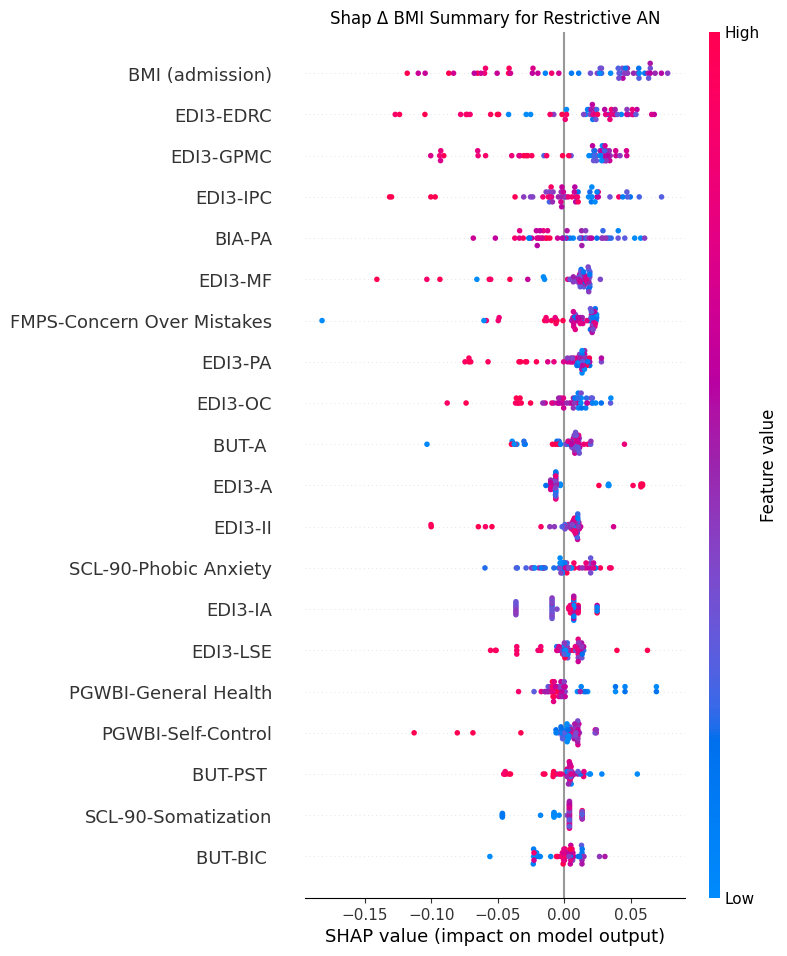

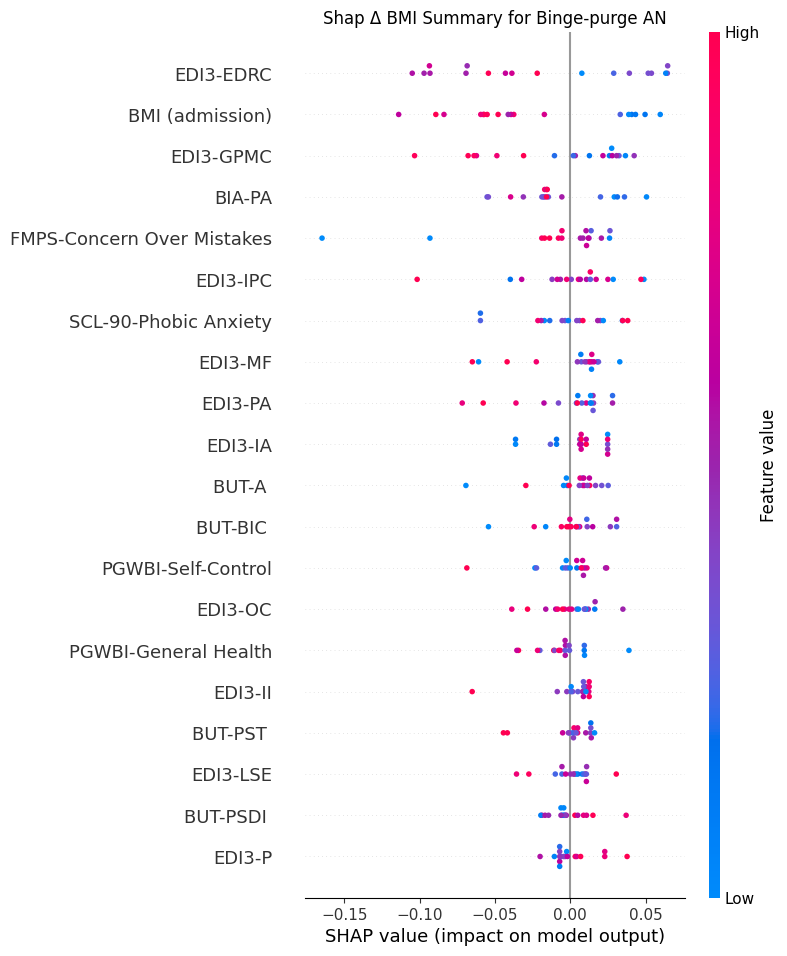

In [ ]:
##SHAP Summary Plot for the AN subcategory
#The most important features for each AN subcategory based on the average positive shap values

subtype_0_value = 0
subtype_1_value = 1

# Identify the indices of each subtype
subtype_0_indices = np.where(df2['Type AN'] == subtype_0_value)[0]
subtype_1_indices = np.where(df2['Type AN'] == subtype_1_value)[0]

# Filter SHAP values for subtype 0
valid_subtype_0_indices = subtype_0_indices[subtype_0_indices < shap_values.shape[0]]
Subtype_0 = df_X.iloc[valid_subtype_0_indices, :]
shap_values_subtype_0 = shap_values[valid_subtype_0_indices, :, 1]

# Filter SHAP values for subtype 1
valid_subtype_1_indices = subtype_1_indices[subtype_1_indices < shap_values.shape[0]]
subtype_1 = df_X.iloc[valid_subtype_1_indices, :]
shap_values_subtype_1 = shap_values[valid_subtype_1_indices, :, 1]

feature_names = df_X.columns

#Summary plot for subtype 0
shap.summary_plot(shap_values_subtype_0, feature_names=feature_names, title="Shap Δ BMI Summary for Restrictive AN", show=False) # Use the column names of df_X as feature names
plt.title("Shap Δ BMI Summary for Restrictive AN")
plt.show()

#Summary plot for subtype 1
shap.summary_plot(shap_values_subtype_1, feature_names=feature_names, title="Shap Δ BMI Summary for Binge-purge AN", show=False) # Use the column names of df_X as feature names
plt.title("Shap Δ BMI Summary for Binge-purge AN")
plt.show()

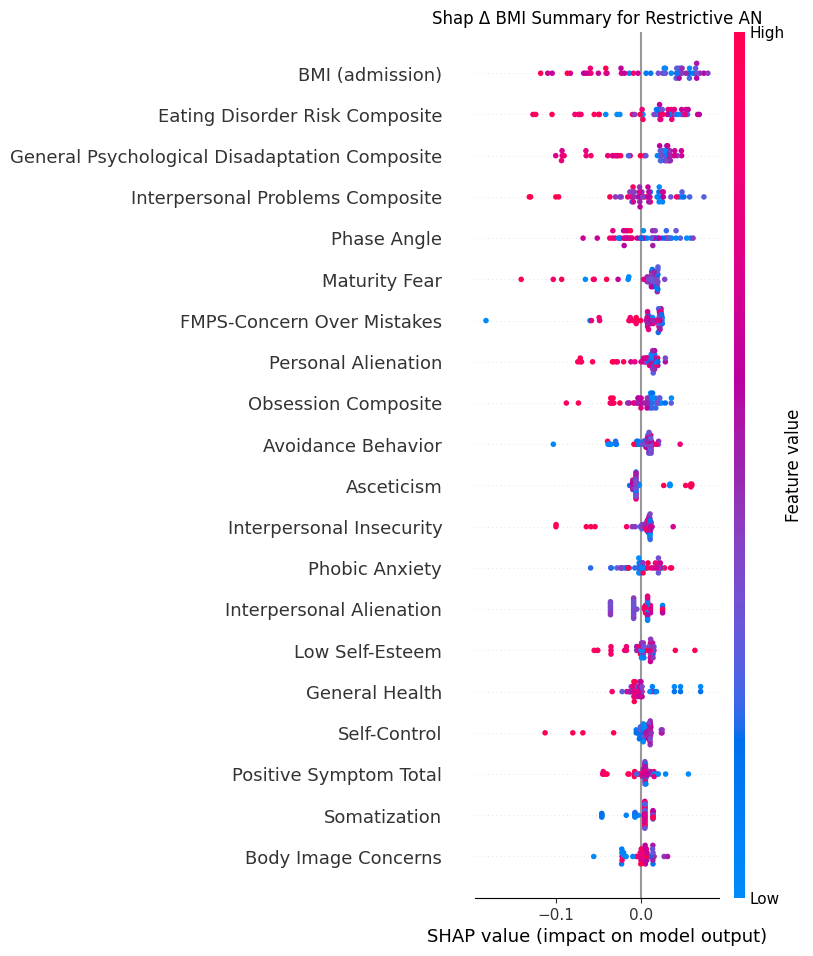

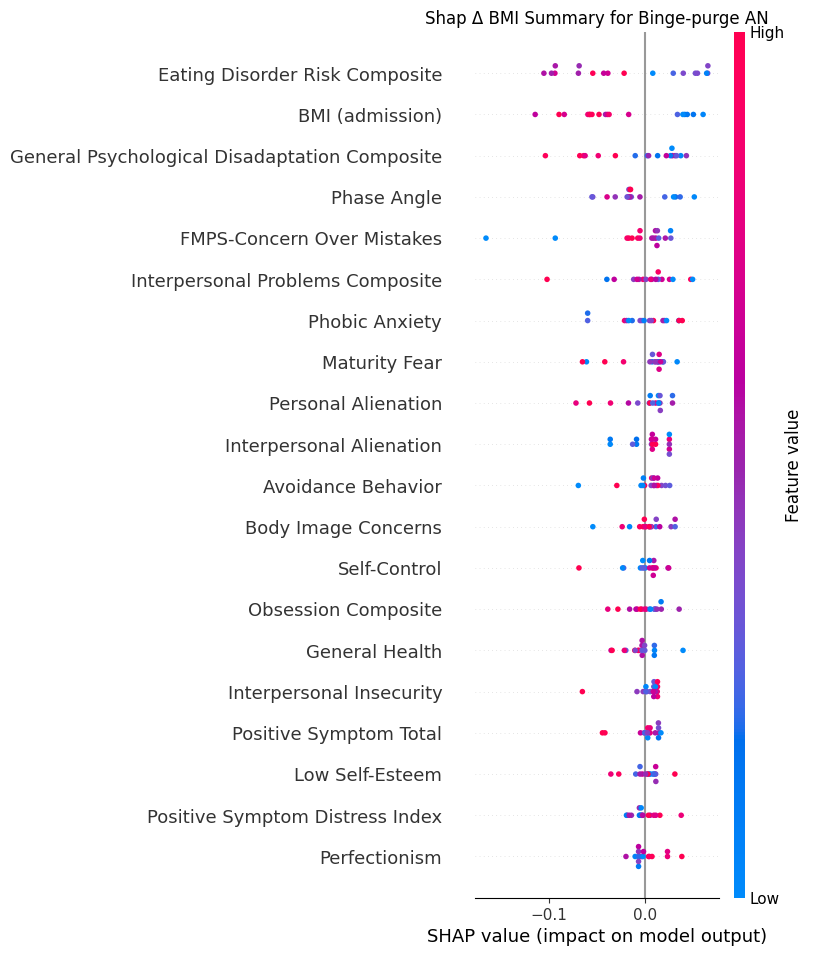

In [57]:
##Renamed labels

# Define AN subcategories
subtype_0_value = 0
subtype_1_value = 1

# Identify the indices of each subtype
subtype_0_indices = np.where(df2['TYPE'] == subtype_0_value)[0]
subtype_1_indices = np.where(df2['TYPE'] == subtype_1_value)[0]

# Filter SHAP values for subtype 0
valid_subtype_0_indices = subtype_0_indices[subtype_0_indices < shap_values.shape[0]]
Subtype_0 = df_X.iloc[valid_subtype_0_indices, :]  # Subset for subtype 0
shap_values_subtype_0 = shap_values[valid_subtype_0_indices, :, 1]

# Filter SHAP values for subtype 1
valid_subtype_1_indices = subtype_1_indices[subtype_1_indices < shap_values.shape[0]]
Subtype_1 = df_X.iloc[valid_subtype_1_indices, :]  # Subset for subtype 1
shap_values_subtype_1 = shap_values[valid_subtype_1_indices, :, 1]

# Mapping of acronyms to full names
acronym_to_fullname = {
    "BIA-ECW": "Extracellular Water",
    "BIA-BCM": "Body Cell Mass",
    "BIA-PA": "Phase Angle",
    "EDI3-DT": "Drive for Thinness",
    "EDI3-B": "Bulimia",
    "EDI3-BD": "Body Dissatisfaction",
    "EDI3-EDRC": "Eating Disorder Risk Composite",
    "EDI3-LSE": "Low Self-Esteem",
    "EDI3-PA": "Personal Alienation",
    "EDI3-II": "Interpersonal Insecurity",
    "EDI3-IA": "Interpersonal Alienation",
    "EDI3-ID": "Interoceptive Deficits",
    "EDI3-ED": "Emotional Dysregulation",
    "EDI3-P": "Perfectionism",
    "EDI3-A": "Asceticism",
    "EDI3-MF": "Maturity Fear",
    "EDI3-IC": "Inadequacy Composite",
    "EDI3-IPC": "Interpersonal Problems Composite",
    "EDI3-APC": "Affective Problem Composite",
    "EDI3-OC": "Obsession Composite",
    "EDI3-GPMC": "General Psychological Disadaptation Composite",
    "EDI3-IN": "Response Incoherence",
    "EDI3-IF": "Infrequency",
    "EDI3-NI": "Negative Impression",
    "SCL-90-Somatization": "Somatization",
    "SCL-90-Obsession/Compulsivity": "Obsession/Compulsivity",
    "SCL-90-Interpersonal Sensitivity": "Interpersonal Sensitivity",
    "SCL-90-Depression": "Depression",
    "SCL-90-Anxiety": "Anxiety",
    "SCL-90-Hostility": "Hostility",
    "SCL-90-Phobic Anxiety": "Phobic Anxiety",
    "SCL-90-Psychoticism": "Psychoticism",
    "SCL-90-Paranoid Ideation": "Paranoid Ideation",
    "SCL-90-SCL Global Index": "Global Index",
    "BUT-GSI ": "Global Severity Index",
    "BUT-WP ": "Weight Phobia",
    "BUT-BIC ": "Body Image Concerns",
    "BUT-A ": "Avoidance Behavior",
    "BUT-CSM ": "Compulsive Self-Monitoring",
    "BUT-D ": "Depersonalization",
    "BUT-PST ": "Positive Symptom Total",
    "BUT-PSDI ": "Positive Symptom Distress Index",
    "PGWBI-Anxiety": "Anxiety",
    "PGWBI-Depression": "Depression",
    "PGWBI-Positivity and Wellbeing": "Positivity and Wellbeing",
    "PGWBI-Self-Control": "Self-Control",
    "PGWBI-General Health": "General Health",
    "PGWBI-Total Score": "Total Score",
    "FMPS-Concerns Over Mistakes": "Concerns Over Mistakes",
    "FMPS-Organization": "Organization",
    "FMPS-Personal Standard": "Personal Standard",
    "FMPS-ParentaL Exp. and Parental Criticism": "Parental Expectation and Criticism"
}

# Replace feature names with full names
full_feature_names = [acronym_to_fullname.get(feature, feature) for feature in feature_names]

# Summary plot for subtype 0
shap.summary_plot(
    shap_values_subtype_0,
    feature_names=full_feature_names,
    title="Shap Δ BMI Summary for Restrictive AN",
    show=False
)
plt.title("Shap Δ BMI Summary for Restrictive AN")
plt.show()

# Summary plot for subtype 1
shap.summary_plot(
    shap_values_subtype_1,
    feature_names=full_feature_names,
    title="Shap Δ BMI Summary for Binge-purge AN",
    show=False
)
plt.title("Shap Δ BMI Summary for Binge-purge AN")
plt.show()
